In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<ipython-input-1-b478a6fd18e5>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df=pd.read_csv("flight_price.csv")

In [3]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302


### Q1. Load the flight price dataset and examine its dimensions. How many rows and columns does the dataset have ?

In [4]:
df.shape

(10683, 11)

**Rows - 10683  , Columns - 11**

### Q2. What is the distribution of flight prices in the dataset? Create a histogram to visualize the distribution.

In [5]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 3.5 MB


In [6]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [9]:
df.duplicated().sum()

220

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.duplicated().sum()

0

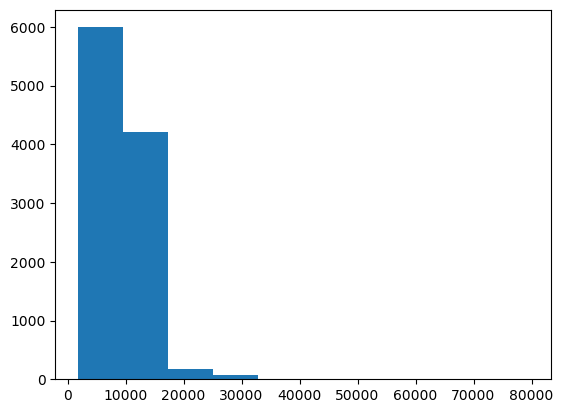

In [12]:
plt.hist(df['Price'])
plt.show()

In [13]:
df['Price'].describe()

count    10462.000000
mean      9026.790289
std       4624.849541
min       1759.000000
25%       5224.000000
50%       8266.000000
75%      12344.750000
max      79512.000000
Name: Price, dtype: float64

**The distribution of flight prices is a right skewed with a thin tail which mean most of the flight tickets price data (75% data )falls in range 1759 to 12344**

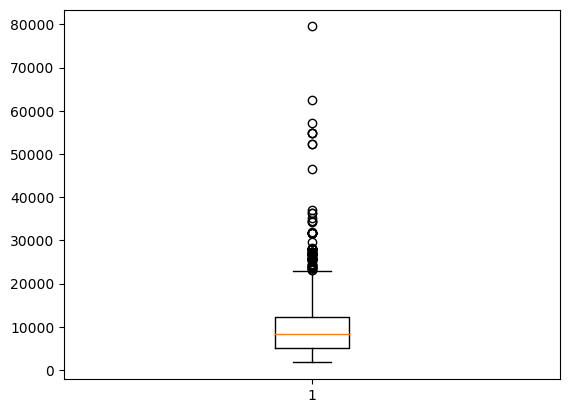

In [14]:
plt.boxplot(df['Price'])
plt.show()

**There exist outliers i.e some of the flight tickets are expensive with maximum price of 79512. Due to present of such values the mean is stretched to right side i.e higher side . Mean>Median**

### Q3. What is the range of prices in the dataset? What is the minimum and maximum price?

In [15]:
df['Price'].describe()

count    10462.000000
mean      9026.790289
std       4624.849541
min       1759.000000
25%       5224.000000
50%       8266.000000
75%      12344.750000
max      79512.000000
Name: Price, dtype: float64

**Price ranges from 1759 to 79512**

### Q4. How does the price of flights vary by airline? Create a boxplot to compare the prices of different airlines 

# -- Incomplete

In [16]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [17]:
df.groupby('Airline')['Price'].mean()

Airline
Air Asia                              5590.260188
Air India                             9556.608028
GoAir                                 5861.056701
IndiGo                                5668.469897
Jet Airways                          11599.021081
Jet Airways Business                 58358.666667
Multiple carriers                    10902.678094
Multiple carriers Premium economy    11418.846154
SpiceJet                              4335.841718
Trujet                                4140.000000
Vistara                               7801.355649
Vistara Premium economy               8962.333333
Name: Price, dtype: float64

### Q5. Are there any outliers in the dataset? Identify any potential outliers using a boxplot and describe how they may impact your analysis.

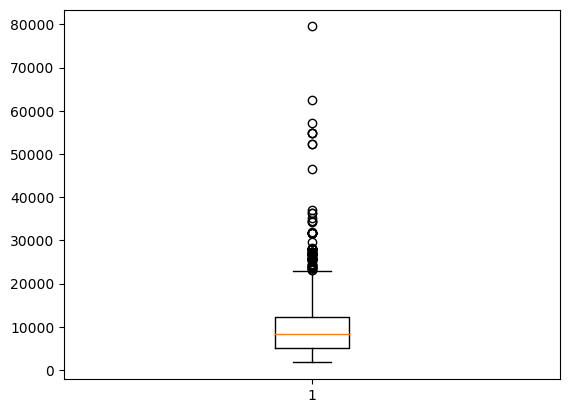

In [18]:
plt.boxplot(df['Price'])
plt.show()

**Yes , outliers are present in the dataset on higher side , due to presence of outliers distribution is stretched to right side making i.e right skewed. Mean > Median . These outliers have caused skewness and as per kurtosis analysis the distribution is thin tailed which suggests that the number of outliers are very less**

### Q6. You are working for a travel agency, and your boss has asked you to analyze the Flight Price dataset 
to identify the peak travel season. What features would you analyze to identify the peak season, and how 
would you present your findings to your boss?

In [19]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [20]:
df['Date_of_Journey']=pd.to_datetime(df['Date_of_Journey'])

<ipython-input-20-0dae34bde00c>:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date_of_Journey']=pd.to_datetime(df['Date_of_Journey'])


In [21]:
df.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time                   object
Arrival_Time               object
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [22]:
df['Month']=df['Date_of_Journey'].dt.month

In [23]:
df.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time                   object
Arrival_Time               object
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
Month                       int32
dtype: object

In [24]:
df.groupby('Month')['Price'].mean()

Month
3    10695.397311
4     5766.545455
5     9029.239764
6     8736.152522
Name: Price, dtype: float64

In [25]:
df.groupby('Month')['Price'].agg({'mean' , 'median' , 'sum' , 'min' , 'max'})

,median,max,mean,sum,min
Month,,,,,
3,9769.0,79512,10695.397311,28642274,1759
4,5073.0,17531,5766.545455,6216336,1759
5,8662.0,34273,9029.239764,30654269,1965
6,8510.0,18804,8736.152522,28925401,1965


**Based on the above analysis it can be concluded that peak season for travel is month 5 followed by month 3 , 6 and 4**

### Q7. You are a data analyst for a flight booking website, and you have been asked to analyze the Flight Price dataset to identify any trends in flight prices. What features would you analyze to identify these trends, and what visualizations would you use to present your findings to your team?

In [26]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Month
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,3
1,Air India,2019-05-01,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302,3


In [27]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Month'],
      dtype='object')

In [28]:
df['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [29]:
df['Date_of_Journey']=df['Date_of_Journey'].dt.day

In [30]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Month
0,IndiGo,24,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,3
1,Air India,1,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5
2,Jet Airways,9,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6
3,IndiGo,12,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5
4,IndiGo,1,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302,3


In [31]:
## Trend 

In [32]:
df.groupby('Airline')['Price'].mean().sort_values(ascending=False)

Airline
Jet Airways Business                 58358.666667
Jet Airways                          11599.021081
Multiple carriers Premium economy    11418.846154
Multiple carriers                    10902.678094
Air India                             9556.608028
Vistara Premium economy               8962.333333
Vistara                               7801.355649
GoAir                                 5861.056701
IndiGo                                5668.469897
Air Asia                              5590.260188
SpiceJet                              4335.841718
Trujet                                4140.000000
Name: Price, dtype: float64

In [33]:
df.groupby('Month')['Price'].mean().sort_values(ascending=False)

Month
3    10695.397311
5     9029.239764
6     8736.152522
4     5766.545455
Name: Price, dtype: float64

In [34]:
df.groupby(['Source' , 'Destination'])['Price'].mean().unstack()

Destination,Banglore,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
Source,,,,,,
Banglore,NaN,NaN,5143.918577,NaN,NaN,12007.421225
Chennai,NaN,NaN,NaN,NaN,4789.892388,NaN
Delhi,NaN,10461.60069,NaN,NaN,NaN,NaN
Kolkata,9143.083566,NaN,NaN,NaN,NaN,NaN
Mumbai,NaN,NaN,NaN,5059.708752,NaN,NaN


### Cross verifying the above data

In [35]:
df[(df['Source']=='Mumbai') & (df['Destination']=='Banglore')]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Month


In [36]:
df[(df['Source']=='Mumbai') & (df['Destination']=='Cochin')]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Month


In [37]:
df[(df['Source']=='Mumbai') & (df['Destination']=='Delhi')]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Month


In [38]:
df[(df['Source']=='Mumbai') & (df['Destination']=='Kolkata')]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Month


In [39]:
df[(df['Source']=='Mumbai') & (df['Destination']=='New Delhi')]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Month


In [40]:
df[(df['Source']=='Mumbai') & (df['Destination']=='Hyderabad')]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Month
59,Vistara,6,Mumbai,Hyderabad,BOM ? DEL ? HYD,15:40,16:45 07 Mar,25h 5m,1 stop,No info,12395,3
67,Air India,6,Mumbai,Hyderabad,BOM ? HYD,13:55,15:25,1h 30m,non-stop,No info,3625,5
70,Jet Airways,1,Mumbai,Hyderabad,BOM ? HYD,07:05,08:30,1h 25m,non-stop,No info,5678,6
77,IndiGo,3,Mumbai,Hyderabad,BOM ? HYD,06:25,07:55,1h 30m,non-stop,No info,4049,4
98,Jet Airways,18,Mumbai,Hyderabad,BOM ? HYD,07:05,08:30,1h 25m,non-stop,No info,8040,6
...,...,...,...,...,...,...,...,...,...,...,...,...
10611,Jet Airways,18,Mumbai,Hyderabad,BOM ? HYD,07:05,08:30,1h 25m,non-stop,In-flight meal not included,4050,5
10617,IndiGo,27,Mumbai,Hyderabad,BOM ? HYD,02:35,04:05,1h 30m,non-stop,No info,2754,5
10655,Jet Airways,3,Mumbai,Hyderabad,BOM ? HYD,02:55,04:20,1h 25m,non-stop,No info,5678,5
10671,Air India,6,Mumbai,Hyderabad,BOM ? HYD,21:05,22:25,1h 20m,non-stop,No info,3100,6


### Impact of stops

In [41]:
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [42]:
df.groupby('Total_Stops')['Price'].mean().sort_values(ascending=False)

Total_Stops
4 stops     17686.000000
3 stops     13260.674419
2 stops     12761.099393
1 stop      10594.123556
non-stop     5018.506763
Name: Price, dtype: float64

In [43]:
df['Price'].describe()

count    10462.000000
mean      9026.790289
std       4624.849541
min       1759.000000
25%       5224.000000
50%       8266.000000
75%      12344.750000
max      79512.000000
Name: Price, dtype: float64

In [44]:
df.groupby('Total_Stops')['Price'].count().sort_values(ascending=False)

Total_Stops
1 stop      5625
non-stop    3475
2 stops     1318
3 stops       43
4 stops        1
Name: Price, dtype: int64

In [45]:
df['Total_Stops'].replace('2 stops' , 2  , inplace=True)
df['Total_Stops'].replace('3 stops' , 3 , inplace=True)
df['Total_Stops'].replace('4 stops' , 4 , inplace=True)
df['Total_Stops'].replace('1 stop' , 1 , inplace=True)
df['Total_Stops'].replace('non-stop' , 0 , inplace=True)

<ipython-input-45-1d9a144493fd>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Total_Stops'].replace('2 stops' , 2  , inplace=True)
<ipython-input-45-1d9a144493fd>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

In [46]:
df['Total_Stops'].unique()

array([0, 2, 1, 3, 4], dtype=int64)

In [47]:
df['Total_Stops'].value_counts()

Total_Stops
1    5625
0    3475
2    1318
3      43
4       1
Name: count, dtype: int64

### Flight duration and Price relationship

In [48]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Month
0,IndiGo,24,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,0,No info,3897,3
1,Air India,1,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2,No info,7662,5
2,Jet Airways,9,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2,No info,13882,6
3,IndiGo,12,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1,No info,6218,5
4,IndiGo,1,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1,No info,13302,3


In [49]:
df['Hours']=df['Duration'].str.split(' ').str[0]

In [50]:
df['Hours']

0         2h
1         7h
2        19h
3         5h
4         4h
        ... 
10678     2h
10679     2h
10680     3h
10681     2h
10682     8h
Name: Hours, Length: 10462, dtype: object

In [51]:
df['Hours']=df['Hours'].str.replace('h' , '')

In [52]:
df['Hours']

0         2
1         7
2        19
3         5
4         4
         ..
10678     2
10679     2
10680     3
10681     2
10682     8
Name: Hours, Length: 10462, dtype: object

In [53]:
df['Hours']=df['Hours'].str.replace('m' , '')

In [54]:
df['Hours']=df['Hours'].astype(int)

In [55]:
df['Hours']=df['Hours']*60

In [56]:
df['Mins']=df['Duration'].str.split(' ').str[1]

In [57]:
df['Mins']=df['Mins'].str.replace('m' , '')

In [58]:
df['Mins']=df['Mins'].replace(np.nan , 0)

In [59]:
df['Mins']

0        50
1        25
2         0
3        25
4        45
         ..
10678    30
10679    35
10680     0
10681    40
10682    20
Name: Mins, Length: 10462, dtype: object

In [60]:
df['Mins']=df['Mins'].astype(int)

In [61]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Month,Hours,Mins
0,IndiGo,24,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,0,No info,3897,3,120,50
1,Air India,1,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2,No info,7662,5,420,25
2,Jet Airways,9,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2,No info,13882,6,1140,0
3,IndiGo,12,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1,No info,6218,5,300,25
4,IndiGo,1,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1,No info,13302,3,240,45


In [62]:
df['Duration']=df['Hours'] + df['Mins']

In [63]:
df['Duration']

0         170
1         445
2        1140
3         325
4         285
         ... 
10678     150
10679     155
10680     180
10681     160
10682     500
Name: Duration, Length: 10462, dtype: int32

In [64]:
df.drop(['Hours' , 'Mins'] , axis=1 , inplace=True)

In [65]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Month
0,IndiGo,24,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,170,0,No info,3897,3
1,Air India,1,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,445,2,No info,7662,5
2,Jet Airways,9,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,1140,2,No info,13882,6
3,IndiGo,12,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,325,1,No info,6218,5
4,IndiGo,1,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,285,1,No info,13302,3


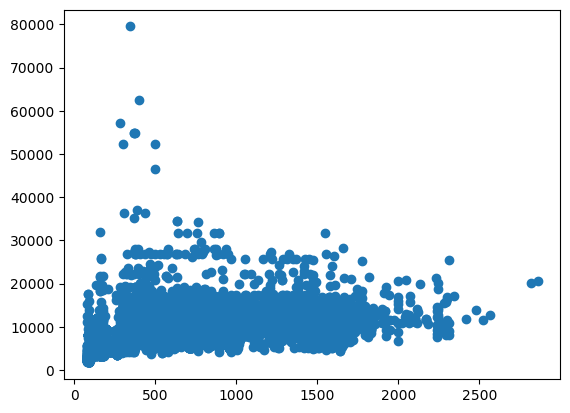

In [66]:
plt.scatter(df['Duration'] , df['Price'])

In [67]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Month'],
      dtype='object')

In [68]:
df.groupby('Additional_Info')['Price'].mean().sort_values(ascending=False)

Additional_Info
Business class                  56811.250000
1 Short layover                 26743.000000
2 Long layover                  26480.000000
1 Long layover                  22109.631579
Change airports                 16800.714286
Red-eye flight                  10873.000000
In-flight meal not included      9435.647456
No info                          9075.257394
No Info                          8044.666667
No check-in baggage included     3642.465409
Name: Price, dtype: float64

### Q8. You are a data scientist working for an airline company, and you have been asked to analyze the Flight Price dataset to identify the factors that affect flight prices. What features would you analyze to identify these factors, and how would you present your findings to the management team?

In [69]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Month
0,IndiGo,24,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,170,0,No info,3897,3
1,Air India,1,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,445,2,No info,7662,5
2,Jet Airways,9,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,1140,2,No info,13882,6
3,IndiGo,12,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,325,1,No info,6218,5
4,IndiGo,1,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,285,1,No info,13302,3


In [70]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Month'],
      dtype='object')

In [71]:
analysis_cols=['Airline' ,'Source', 'Destination' , 'Duration' , 'Total_Stops' , 'Additional_Info'  , 'Month']
## To analyze price

### Airline wise analysis

In [72]:
Airline_Price=pd.DataFrame(df.groupby('Airline')['Price'].mean().sort_values(ascending=False)).reset_index()
Airline_Price

,Airline,Price
0,Jet Airways Business,58358.666667
1,Jet Airways,11599.021081
2,Multiple carriers Premium economy,11418.846154
3,Multiple carriers,10902.678094
4,Air India,9556.608028
5,Vistara Premium economy,8962.333333
6,Vistara,7801.355649
7,GoAir,5861.056701
8,IndiGo,5668.469897
9,Air Asia,5590.260188


In [73]:
Airline_count=pd.DataFrame(df.groupby('Airline')['Price'].count().sort_values(ascending=False)).reset_index()
Airline_count
Airline_count.columns=['Airline' , 'Passenger_count']
Airline_count

,Airline,Passenger_count
0,Jet Airways,3700
1,IndiGo,2043
2,Air India,1694
3,Multiple carriers,1196
4,SpiceJet,815
5,Vistara,478
6,Air Asia,319
7,GoAir,194
8,Multiple carriers Premium economy,13
9,Jet Airways Business,6


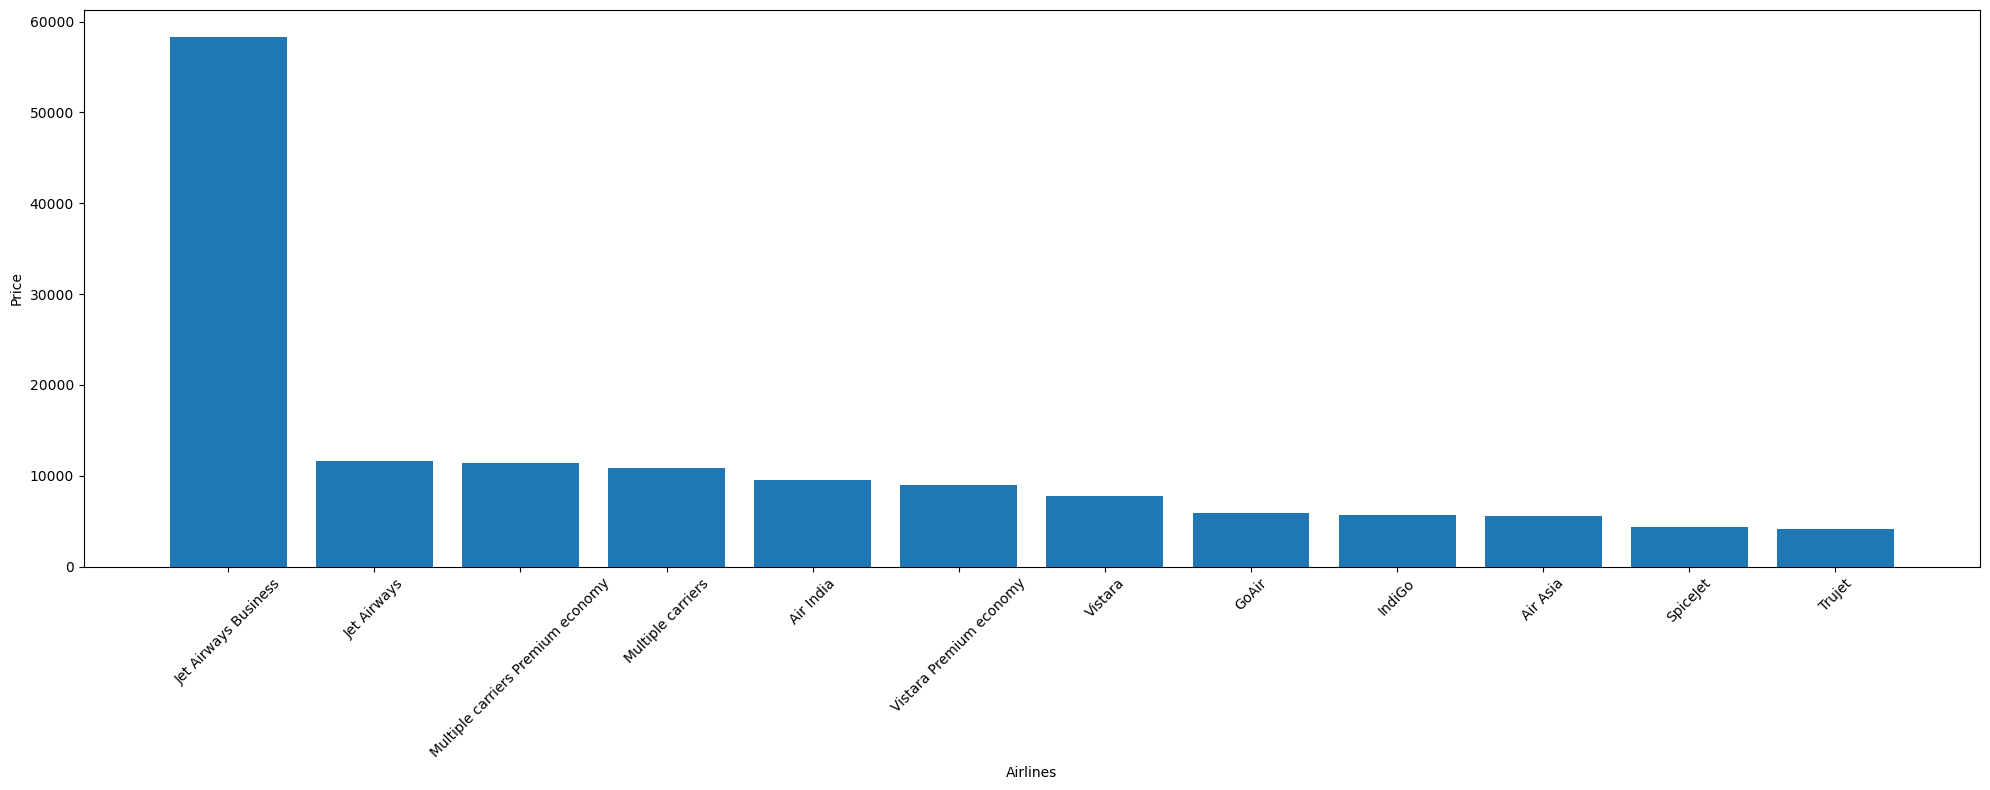

In [74]:
plt.figure(figsize=(20  ,8))
plt.bar(Airline_Price['Airline'] , Airline_Price['Price'])
plt.xlabel('Airlines')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.tight_layout()

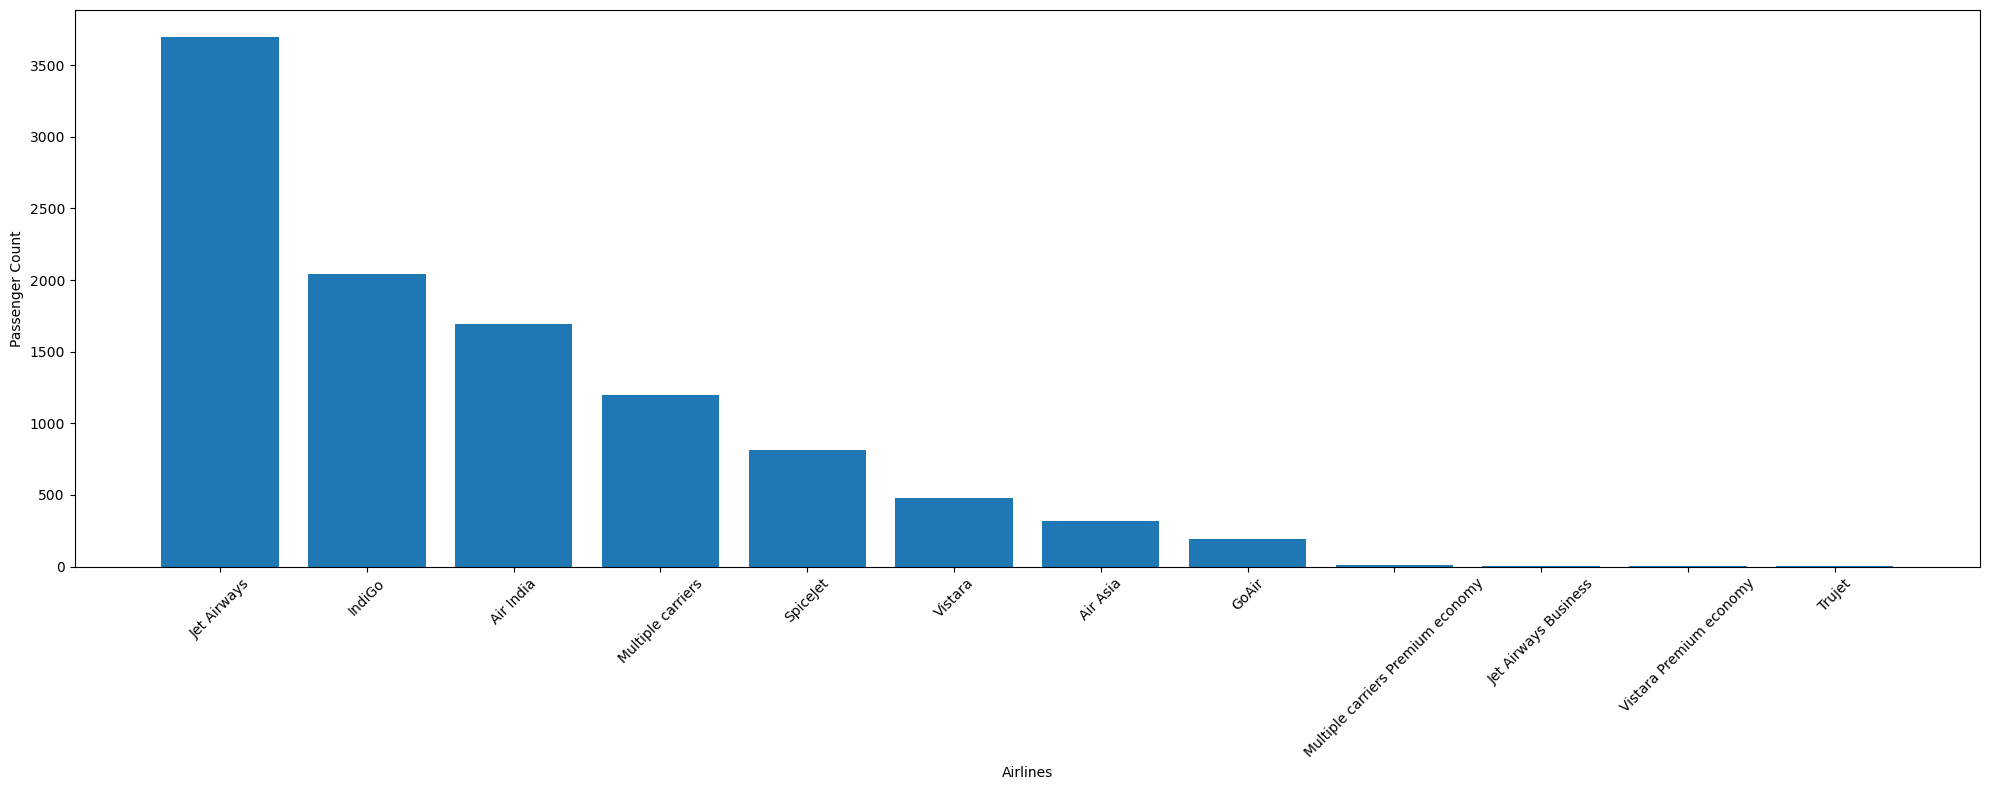

In [75]:
plt.figure(figsize=(20  ,8))
plt.bar(Airline_count['Airline'] , Airline_count['Passenger_count'])
plt.xlabel('Airlines')
plt.ylabel('Passenger Count')
plt.xticks(rotation=45)
plt.tight_layout()

**1. Jet Airways Business**

Average Price: ₹58,359 (Highest among all airlines, Rank: 1 in pricing)

Passenger Count: 6 (Extremely low, Rank: 10)

Insight: Exclusively premium-priced, targeted at business travelers. Limited passenger count aligns with a niche, high-value service.

**2. Jet Airways**

Average Price: ₹11,599 (Rank: 2 in pricing)

Passenger Count: 3,700 (Highest, Rank: 1)

Insight: A major airline with the highest passenger base. Balances higher-than-average pricing with extensive reach.

**3. Multiple Carriers Premium Economy**

Average Price: ₹11,419 (Rank: 3 in pricing)

Passenger Count: 13 (Rank: 9)

Insight: Premium offering with pricing just below Jet Airways. Passenger count suggests a small market share for this category.

**4. Multiple Carriers**

Average Price: ₹10,903 (Rank: 4 in pricing)

Passenger Count: 1,196 (Rank: 4)

Insight: Mid-tier pricing with a relatively large customer base. Popular among economy travelers using combined carriers.

**5. Air India**

Average Price: ₹9,557 (Rank: 5 in pricing)

Passenger Count: 1,694 (Rank: 3)

Insight: A prominent legacy carrier with moderate pricing and a significant passenger base. Appeals to both budget and mainstream flyers.

**6. Vistara Premium Economy**

Average Price: ₹8,962 (Rank: 6 in pricing)

Passenger Count: 3 (Rank: 11)

Insight: Premium pricing with the smallest customer base. A niche, luxury-focused service.

**7. Vistara**

Average Price: ₹7,801 (Rank: 7 in pricing)

Passenger Count: 478 (Rank: 5)

Insight: Competitive pricing with a moderate customer base. Likely an emerging player focusing on quality.

**8. GoAir**

Average Price: ₹5,861 (Rank: 8 in pricing)

Passenger Count: 194 (Rank: 7)

Insight: Affordable pricing for budget-conscious travelers. Relatively small market share.

**9. IndiGo**

Average Price: ₹5,668 (Rank: 9 in pricing)

Passenger Count: 2,043 (Rank: 2)

Insight: Competitive pricing with a strong passenger base. A dominant player in the budget segment.

**10. Air Asia**

Average Price: ₹5,590 (Rank: 10 in pricing)

Passenger Count: 319 (Rank: 6)

Insight: Affordable and well-suited for budget travelers. Smaller market share compared to IndiGo.

**11. SpiceJet**

Average Price: ₹4,336 (Rank: 11 in pricing)

Passenger Count: 815 (Rank: 5)

Insight: Low pricing with a sizable customer base. Clearly appeals to budget-conscious flyers.

**12. Trujet**

Average Price: ₹4,140 (Lowest, Rank: 12 in pricing)

Passenger Count: 1 (Lowest, Rank: 12)

Insight: Ultra-low cost with negligible market presence. Likely a niche or regional carrier.

In [76]:
Airline_indepth=pd.DataFrame(df.groupby('Airline')['Price'].agg({'mean' , 'median' , 'sum' , 'min' , 'max'})).reset_index()
Airline_indepth

,Airline,median,max,mean,sum,min
0,Air Asia,5162.0,13774,5590.260188,1783293,3383
1,Air India,9316.0,31945,9556.608028,16188894,2050
2,GoAir,5135.0,22794,5861.056701,1137045,3398
3,IndiGo,5000.0,22153,5668.469897,11580684,2227
4,Jet Airways,11134.0,54826,11599.021081,42916378,1840
5,Jet Airways Business,54747.0,79512,58358.666667,350152,46490
6,Multiple carriers,10197.0,36983,10902.678094,13039603,5797
7,Multiple carriers Premium economy,11269.0,14629,11418.846154,148445,9845
8,SpiceJet,3873.0,23267,4335.841718,3533711,1759
9,Trujet,4140.0,4140,4140.000000,4140,4140


### Source and Destination

In [77]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Month
0,IndiGo,24,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,170,0,No info,3897,3
1,Air India,1,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,445,2,No info,7662,5
2,Jet Airways,9,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,1140,2,No info,13882,6
3,IndiGo,12,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,325,1,No info,6218,5
4,IndiGo,1,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,285,1,No info,13302,3


In [78]:
df.pivot_table(index='Source' , columns='Destination' , values='Price' , aggfunc='mean')

Destination,Banglore,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
Source,,,,,,
Banglore,NaN,NaN,5143.918577,NaN,NaN,12007.421225
Chennai,NaN,NaN,NaN,NaN,4789.892388,NaN
Delhi,NaN,10461.60069,NaN,NaN,NaN,NaN
Kolkata,9143.083566,NaN,NaN,NaN,NaN,NaN
Mumbai,NaN,NaN,NaN,5059.708752,NaN,NaN


Flights from Bangalore to Delhi are priced at ₹5143.92 on average, while flights from Bangalore to New Delhi are significantly more expensive at ₹12007.42.

Flights from Mumbai to Hyderabad cost ₹5059.71 on average, which seems relatively affordable for that route.

Kolkata to Bangalore shows an average flight price of ₹9143.08.

In [79]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Month
0,IndiGo,24,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,170,0,No info,3897,3
1,Air India,1,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,445,2,No info,7662,5
2,Jet Airways,9,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,1140,2,No info,13882,6
3,IndiGo,12,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,325,1,No info,6218,5
4,IndiGo,1,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,285,1,No info,13302,3
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9,Kolkata,Banglore,CCU ? BLR,19:55,22:25,150,0,No info,4107,4
10679,Air India,27,Kolkata,Banglore,CCU ? BLR,20:45,23:20,155,0,No info,4145,4
10680,Jet Airways,27,Banglore,Delhi,BLR ? DEL,08:20,11:20,180,0,No info,7229,4
10681,Vistara,1,Banglore,New Delhi,BLR ? DEL,11:30,14:10,160,0,No info,12648,3


In [80]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Month'],
      dtype='object')

In [81]:
analysis_cols

['Airline',
 'Source',
 'Destination',
 'Duration',
 'Total_Stops',
 'Additional_Info',
 'Month']

### Duration

In [82]:
df['Duration']

0         170
1         445
2        1140
3         325
4         285
         ... 
10678     150
10679     155
10680     180
10681     160
10682     500
Name: Duration, Length: 10462, dtype: int32

Text(0, 0.5, 'Price')

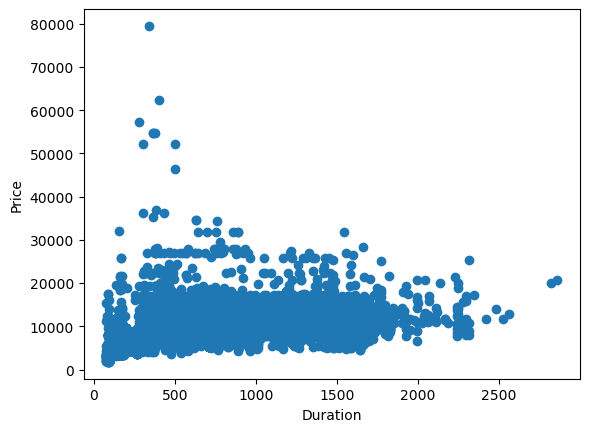

In [83]:
plt.scatter(df['Duration']  , df['Price'])
plt.xlabel('Duration')
plt.ylabel('Price')

### Month

In [84]:
month_count=pd.DataFrame(df['Month'].value_counts().sort_values(ascending=False))
month_count

,count
Month,
5,3395
6,3311
3,2678
4,1078


In [85]:
month_count.index=['May' , 'June' , 'March' , 'April']

In [86]:
categories=month_count.index
categories

Index(['May', 'June', 'March', 'April'], dtype='object')

In [87]:
values=month_count['count']
values

May      3395
June     3311
March    2678
April    1078
Name: count, dtype: int64

Text(0, 0.5, 'Count')

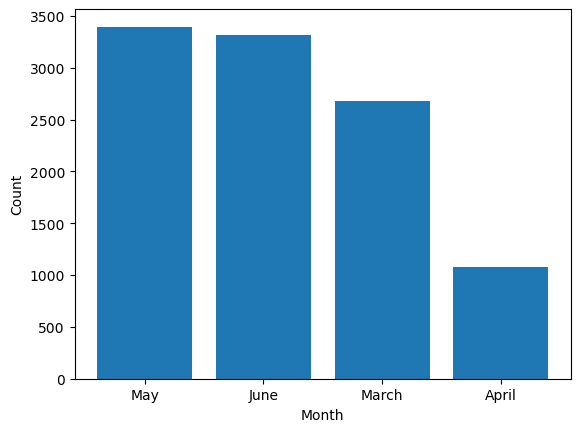

In [88]:
plt.bar(categories , values )
plt.xlabel('Month')
plt.ylabel('Count')

## Total stops

In [89]:
df['Total_Stops'].unique()

array([0, 2, 1, 3, 4], dtype=int64)

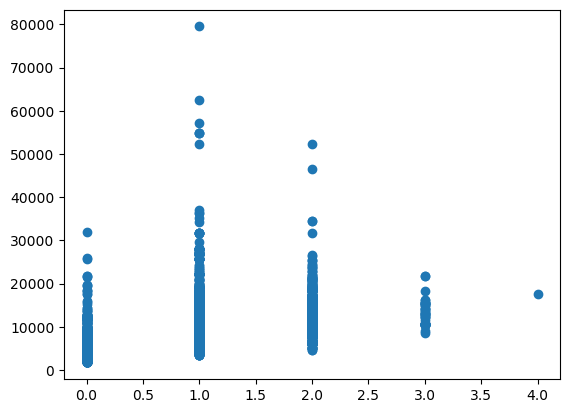

In [90]:
plt.scatter(x=df['Total_Stops'] , y=df['Price'])

In [91]:
df[df['Total_Stops']==4]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Month
9182,Air India,1,Banglore,New Delhi,BLR ? CCU ? BBI ? HYD ? VGA ? DEL,05:50,11:20 02 Mar,1770,4,Change airports,17686,3


## Route 

In [92]:
route_counts=df['Route'].value_counts()
route_counts

Route
DEL ? BOM ? COK          2376
BLR ? DEL                1536
CCU ? BOM ? BLR           979
CCU ? BLR                 724
BOM ? HYD                 621
                         ... 
CCU ? VTZ ? BLR             1
CCU ? IXZ ? MAA ? BLR       1
BOM ? COK ? MAA ? HYD       1
BOM ? CCU ? HYD             1
BOM ? BBI ? HYD             1
Name: count, Length: 128, dtype: int64

In [93]:
route_counts.head(10)

Route
DEL ? BOM ? COK    2376
BLR ? DEL          1536
CCU ? BOM ? BLR     979
CCU ? BLR           724
BOM ? HYD           621
CCU ? DEL ? BLR     565
BLR ? BOM ? DEL     402
MAA ? CCU           381
DEL ? HYD ? COK     326
DEL ? BLR ? COK     232
Name: count, dtype: int64

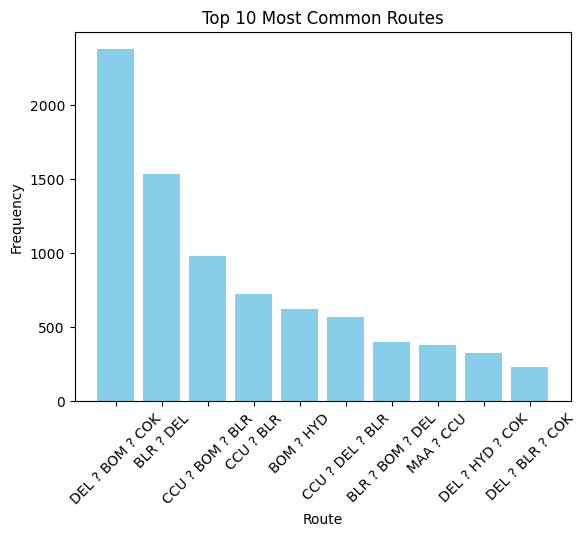

In [94]:
plt.bar(route_counts.head(10).index , route_counts.head(10).values , color='skyblue')
plt.title('Top 10 Most Common Routes')
plt.xlabel('Route')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

In [95]:
df.groupby('Route')['Price'].mean().sort_values(ascending=False).head(10)

Route
BOM ? DED ? DEL ? HYD                24115.000000
BOM ? JDH ? DEL ? HYD                23867.000000
BOM ? VNS ? DEL ? HYD                23528.000000
BOM ? UDR ? DEL ? HYD                22950.000000
BOM ? BDQ ? DEL ? HYD                22792.500000
DEL ? DED ? BOM ? COK                19539.500000
DEL ? IXU ? BOM ? COK                19381.333333
BOM ? JDH ? JAI ? DEL ? HYD          18293.000000
BOM ? JAI ? DEL ? HYD                17926.000000
BLR ? CCU ? BBI ? HYD ? VGA ? DEL    17686.000000
Name: Price, dtype: float64

In [96]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Month
0,IndiGo,24,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,170,0,No info,3897,3
1,Air India,1,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,445,2,No info,7662,5
2,Jet Airways,9,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,1140,2,No info,13882,6
3,IndiGo,12,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,325,1,No info,6218,5
4,IndiGo,1,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,285,1,No info,13302,3


In [97]:
df.dtypes

Airline            object
Date_of_Journey     int32
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration            int32
Total_Stops         int64
Additional_Info    object
Price               int64
Month               int32
dtype: object

In [98]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Month
0,IndiGo,24,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,170,0,No info,3897,3
1,Air India,1,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,445,2,No info,7662,5
2,Jet Airways,9,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,1140,2,No info,13882,6
3,IndiGo,12,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,325,1,No info,6218,5
4,IndiGo,1,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,285,1,No info,13302,3


In [99]:
df['Departure']=pd.to_datetime(df['Dep_Time'])

<ipython-input-99-d2fd450b4546>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Departure']=pd.to_datetime(df['Dep_Time'])


In [100]:
df['Dep_hour'] = pd.to_datetime(df['Departure'], format='%H:%M:%S').dt.hour

In [101]:
df.dtypes

Airline                    object
Date_of_Journey             int32
Source                     object
Destination                object
Route                      object
Dep_Time                   object
Arrival_Time               object
Duration                    int32
Total_Stops                 int64
Additional_Info            object
Price                       int64
Month                       int32
Departure          datetime64[ns]
Dep_hour                    int32
dtype: object

## Time of Departure

In [102]:
mor=0
aft=0
eve=0
night=0

for i in df['Dep_hour']:
    if i >=5  and i<=12 :
        mor=mor + 1
    elif  i>12 and i<=16:
        aft=aft+1
    elif i >16  and i<=21:
        eve=eve+1
    else:
        night=night+1
        

In [103]:
flight_time = pd.DataFrame(data=[mor,aft , eve , night] , index=['morning' , 'afternoon' , 'evening' , 'night']).reset_index()

In [104]:
flight_time.columns=['Departure Time' , 'Count']

In [105]:
flight_time

,Departure Time,Count
0,morning,4984
1,afternoon,1696
2,evening,2812
3,night,970


Text(0.5, 0, 'Departure Time')

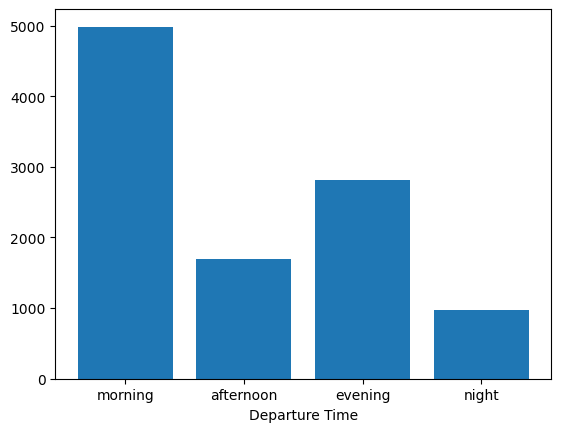

In [106]:
plt.bar( flight_time['Departure Time'] , flight_time['Count'])
plt.xlabel('Departure Time')

In [107]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Month,Departure,Dep_hour
0,IndiGo,24,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,170,0,No info,3897,3,2025-03-18 22:20:00,22
1,Air India,1,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,445,2,No info,7662,5,2025-03-18 05:50:00,5
2,Jet Airways,9,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,1140,2,No info,13882,6,2025-03-18 09:25:00,9
3,IndiGo,12,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,325,1,No info,6218,5,2025-03-18 18:05:00,18
4,IndiGo,1,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,285,1,No info,13302,3,2025-03-18 16:50:00,16


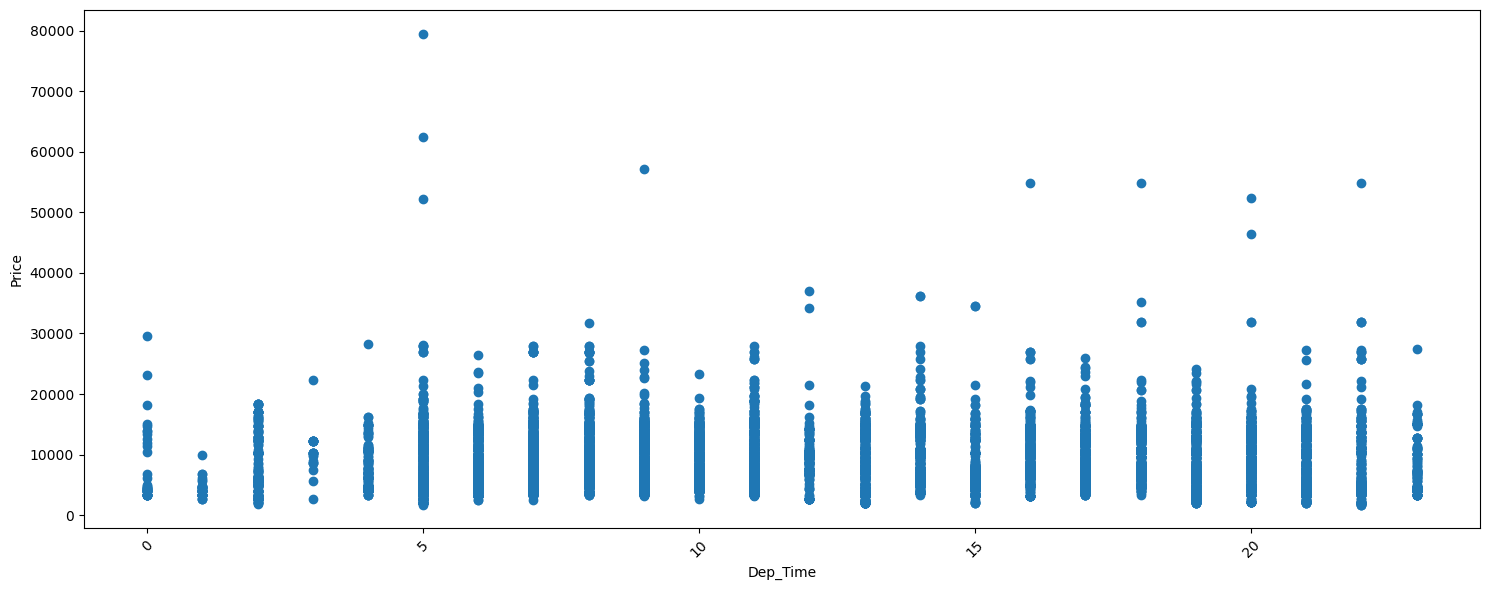

In [108]:
plt.figure(figsize=(15  , 6))
plt.scatter(df['Dep_hour'] , df['Price'])
plt.xlabel('Dep_Time')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.tight_layout()

In [109]:
df[df['Price'] >  70000]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Month,Departure,Dep_hour
2924,Jet Airways Business,1,Banglore,New Delhi,BLR ? BOM ? DEL,05:45,11:25,340,1,Business class,79512,3,2025-03-18 05:45:00,5


## Time of Arrival

In [110]:
df['Arrival_Hour']=df['Arrival_Time'].str.split(':').str[0]

In [111]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Month,Departure,Dep_hour,Arrival_Hour
0,IndiGo,24,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,170,0,No info,3897,3,2025-03-18 22:20:00,22,01
1,Air India,1,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,445,2,No info,7662,5,2025-03-18 05:50:00,5,13
2,Jet Airways,9,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,1140,2,No info,13882,6,2025-03-18 09:25:00,9,04
3,IndiGo,12,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,325,1,No info,6218,5,2025-03-18 18:05:00,18,23
4,IndiGo,1,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,285,1,No info,13302,3,2025-03-18 16:50:00,16,21


In [112]:
df['Arrival_Hour']=df['Arrival_Hour'].astype(int)

In [113]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Month,Departure,Dep_hour,Arrival_Hour
0,IndiGo,24,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,170,0,No info,3897,3,2025-03-18 22:20:00,22,1
1,Air India,1,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,445,2,No info,7662,5,2025-03-18 05:50:00,5,13
2,Jet Airways,9,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,1140,2,No info,13882,6,2025-03-18 09:25:00,9,4
3,IndiGo,12,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,325,1,No info,6218,5,2025-03-18 18:05:00,18,23
4,IndiGo,1,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,285,1,No info,13302,3,2025-03-18 16:50:00,16,21


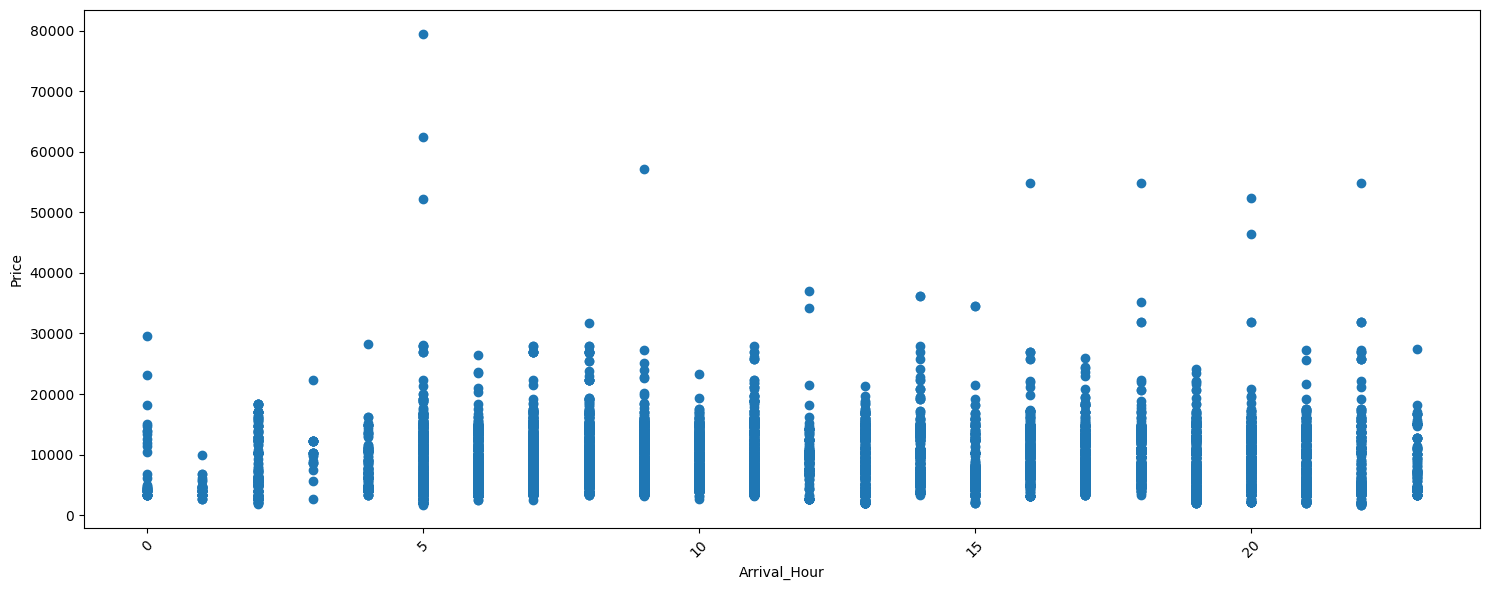

In [114]:
plt.figure(figsize=(15  , 6))
plt.scatter(df['Dep_hour'] , df['Price'])
plt.xlabel('Arrival_Hour')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.tight_layout()

## Total stops

In [115]:
stops = df['Total_Stops'].value_counts().sort_values(ascending=False)
stops

Total_Stops
1    5625
0    3475
2    1318
3      43
4       1
Name: count, dtype: int64

<BarContainer object of 5 artists>

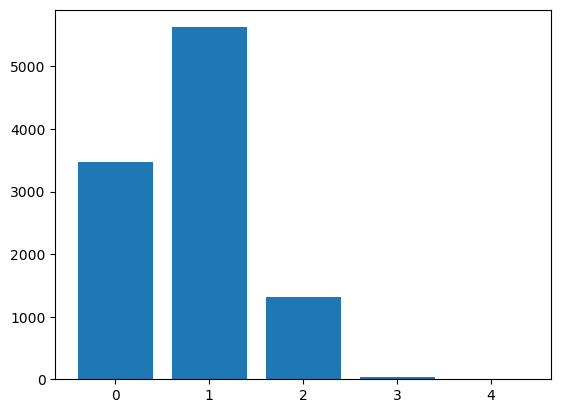

In [116]:
plt.bar(stops.index , stops.values)

In [117]:
df['Total_Stops'].dtypes

dtype('int64')

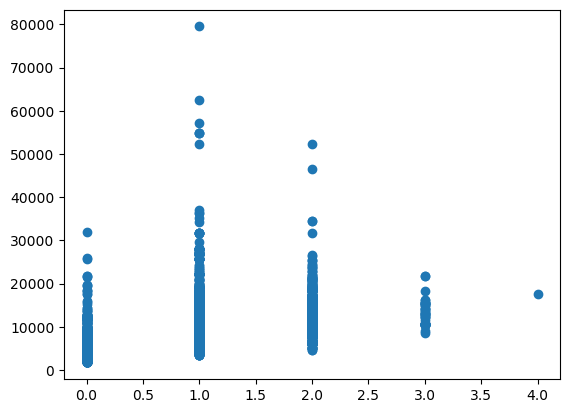

In [118]:
plt.scatter(x=df['Total_Stops'] , y=df['Price'])

In [119]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Month', 'Departure', 'Dep_hour',
       'Arrival_Hour'],
      dtype='object')

## Additional info

In [120]:
df['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [121]:
df['Additional_Info']=df['Additional_Info'].replace('No Info' , 'No info')

In [122]:
df['Additional_Info'].value_counts()

Additional_Info
No info                         8185
In-flight meal not included     1926
No check-in baggage included     318
1 Long layover                    19
Change airports                    7
Business class                     4
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: count, dtype: int64

In [123]:
df.groupby('Additional_Info')['Price'].mean().sort_values(ascending=False)

Additional_Info
Business class                  56811.250000
1 Short layover                 26743.000000
2 Long layover                  26480.000000
1 Long layover                  22109.631579
Change airports                 16800.714286
Red-eye flight                  10873.000000
In-flight meal not included      9435.647456
No info                          9074.879658
No check-in baggage included     3642.465409
Name: Price, dtype: float64

# Google Playstore:


### Q9. Load the Google Playstore dataset and examine its dimensions. How many rows and columns does the dataset have?

In [124]:
df=pd.read_csv("Clean Google play store dataset.csv")

In [125]:
df.head()

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,Day,Month,Year
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,10000,Free,0.0,Everyone,Art & Design,1.0.0,4.0.3 and up,7,1,2018
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3 and up,15,1,2018
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,87000,5000000,Free,0.0,Everyone,Art & Design,1.2.4,4.0.3 and up,1,8,2018
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000,50000000,Free,0.0,Teen,Art & Design,Varies with device,4.2 and up,8,6,2018
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,28000,100000,Free,0.0,Everyone,Art & Design;Creativity,1.1,4.4 and up,20,6,2018


In [126]:
df.shape

(9659, 16)

### Q10. How does the rating of apps vary by category? Create a boxplot to compare the ratings of different app categories.

In [127]:
df.columns

Index(['Unnamed: 0', 'App', 'Category', 'Rating', 'Reviews', 'Size',
       'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Current Ver',
       'Android Ver', 'Day', 'Month', 'Year'],
      dtype='object')

In [128]:
df.drop('Unnamed: 0' , axis=1 , inplace=True)

In [129]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9659 non-null   object 
 1   Category        9659 non-null   object 
 2   Rating          9659 non-null   float64
 3   Reviews         9659 non-null   int64  
 4   Size            9659 non-null   int64  
 5   Installs        9659 non-null   int64  
 6   Type            9659 non-null   object 
 7   Price           9659 non-null   float64
 8   Content Rating  9659 non-null   object 
 9   Genres          9659 non-null   object 
 10  Current Ver     9659 non-null   object 
 11  Android Ver     9659 non-null   object 
 12  Day             9659 non-null   int64  
 13  Month           9659 non-null   int64  
 14  Year            9659 non-null   int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 2.9 MB


In [130]:
df[['Rating' , 'Category']]

,Rating,Category
0,4.1,ART_AND_DESIGN
1,3.9,ART_AND_DESIGN
2,4.7,ART_AND_DESIGN
3,4.5,ART_AND_DESIGN
4,4.3,ART_AND_DESIGN
...,...,...
9654,4.5,FAMILY
9655,5.0,FAMILY
9656,4.3,MEDICAL
9657,4.5,BOOKS_AND_REFERENCE


In [131]:
cat_rat=pd.DataFrame(df.groupby('Category')['Rating'].mean().sort_values(ascending=False)).reset_index()
cat_rat

,Category,Rating
0,EVENTS,4.395313
1,EDUCATION,4.363866
2,ART_AND_DESIGN,4.354687
3,BOOKS_AND_REFERENCE,4.334234
4,PERSONALIZATION,4.325532
5,PARENTING,4.300000
6,BEAUTY,4.283019
7,SOCIAL,4.255230
8,HEALTH_AND_FITNESS,4.251736
9,GAME,4.249948


### Q11. Are there any missing values in the dataset? Identify any missing values and describe how they may impact your analysis.

In [132]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Current Ver       0
Android Ver       0
Day               0
Month             0
Year              0
dtype: int64

### Q12. What is the relationship between the size of an app and its rating? Create a scatter plot to visualize the relationship

In [133]:
numeric_cols=[col for col in df.columns if df[col].dtypes!='O']

In [134]:
numeric_cols

['Rating', 'Reviews', 'Size', 'Installs', 'Price', 'Day', 'Month', 'Year']

In [135]:
df_num=df[numeric_cols]

In [136]:
df_num

,Rating,Reviews,Size,Installs,Price,Day,Month,Year
0,4.1,159,19000,10000,0.0,7,1,2018
1,3.9,967,14000,500000,0.0,15,1,2018
2,4.7,87510,87000,5000000,0.0,1,8,2018
3,4.5,215644,25000,50000000,0.0,8,6,2018
4,4.3,967,28000,100000,0.0,20,6,2018
...,...,...,...,...,...,...,...,...
9654,4.5,38,53000,5000,0.0,25,7,2017
9655,5.0,4,36000,100,0.0,6,7,2018
9656,4.3,3,95000,1000,0.0,20,1,2017
9657,4.5,114,33000,1000,0.0,19,1,2015


In [137]:
df_num.corr()

,Rating,Reviews,Size,Installs,Price,Day,Month,Year
Rating,1.000000,0.050207,0.024036,0.034307,-0.018662,-0.007230,0.008460,0.113852
Reviews,0.050207,1.000000,0.030802,0.625165,-0.007598,-0.033099,0.036541,0.058073
Size,0.024036,0.030802,1.000000,0.005253,-0.008643,0.007502,0.017735,0.159123
Installs,0.034307,0.625165,0.005253,1.000000,-0.009405,-0.042036,0.043178,0.068839
Price,-0.018662,-0.007598,-0.008643,-0.009405,1.000000,-0.009106,0.007348,-0.003608
Day,-0.007230,-0.033099,0.007502,-0.042036,-0.009106,1.000000,-0.066566,-0.015070
Month,0.008460,0.036541,0.017735,0.043178,0.007348,-0.066566,1.000000,-0.199906
Year,0.113852,0.058073,0.159123,0.068839,-0.003608,-0.015070,-0.199906,1.000000


**minimal positive corr exists between size and rating**

In [138]:
df['Size'].nunique()

369

In [139]:
df['Rating'].nunique()

39

Text(0, 0.5, 'Rating')

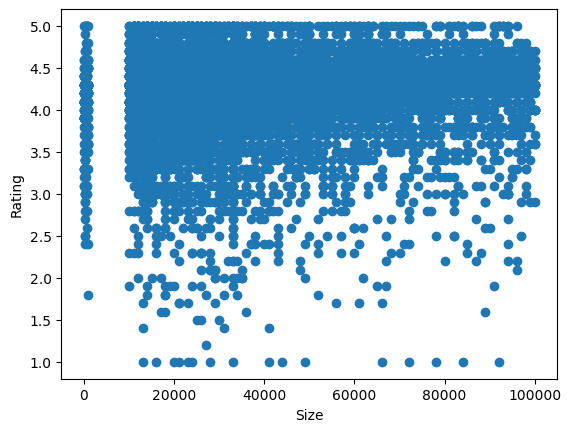

In [140]:
plt.scatter(df['Size'] , df['Rating'])
plt.xlabel('Size')
plt.ylabel('Rating')

### Q13. How does the type of app affect its price? Create a bar chart to compare average prices by app type

In [141]:
df['Type'].unique()

array(['Free', 'Paid'], dtype=object)

In [142]:
app_type=df.groupby('Type')['Price'].mean()
app_type

Type
Free     0.000000
Paid    14.045146
Name: Price, dtype: float64

<BarContainer object of 2 artists>

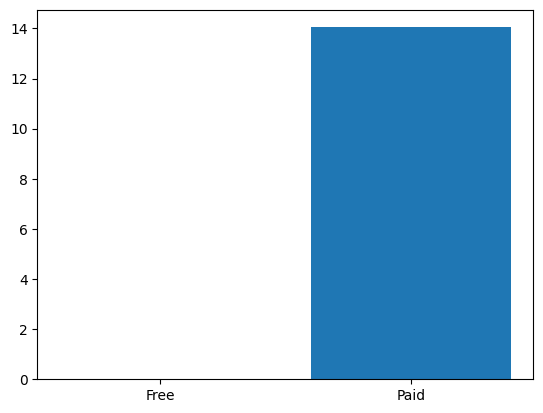

In [143]:
plt.bar(app_type.index , app_type.values)

### Q14. What are the top 10 most popular apps in the dataset? Create a frequency table to identify the apps with the highest number of installs.

In [144]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Current Ver', 'Android Ver',
       'Day', 'Month', 'Year'],
      dtype='object')

In [145]:
df[['App' , 'Installs']].sort_values(by='Installs' , ascending=False).head(10)

,App,Installs
300,WhatsApp Messenger,1000000000
152,Google Play Books,1000000000
1356,Subway Surfers,1000000000
2420,Maps - Navigate & Explore,1000000000
304,Gmail,1000000000
2003,Instagram,1000000000
2002,Facebook,1000000000
302,Google Chrome: Fast & Secure,1000000000
2012,Google+,1000000000
2908,YouTube,1000000000


### Q15. A company wants to launch a new app on the Google Playstore and has asked you to analyze the Google Playstore dataset to identify the most popular app categories. How would you approach this task, and what features would you analyze to make recommendations to the company

In [146]:
imp_cat=df[['Category' , 'Installs']]
imp_cat

,Category,Installs
0,ART_AND_DESIGN,10000
1,ART_AND_DESIGN,500000
2,ART_AND_DESIGN,5000000
3,ART_AND_DESIGN,50000000
4,ART_AND_DESIGN,100000
...,...,...
9654,FAMILY,5000
9655,FAMILY,100
9656,MEDICAL,1000
9657,BOOKS_AND_REFERENCE,1000


**Category by Installs**

In [147]:
imp_cat.groupby('Category')['Installs'].sum().sort_values(ascending=False)

Category
GAME                   13878924415
COMMUNICATION          11038276251
TOOLS                   8001771915
PRODUCTIVITY            5793091369
SOCIAL                  5487867902
PHOTOGRAPHY             4649147655
FAMILY                  4427941505
VIDEO_PLAYERS           3926902720
TRAVEL_AND_LOCAL        2894887146
NEWS_AND_MAGAZINES      2369217760
ENTERTAINMENT           2113660000
BOOKS_AND_REFERENCE     1665969576
PERSONALIZATION         1532494782
SHOPPING                1400348785
HEALTH_AND_FITNESS      1144022512
SPORTS                  1096474498
BUSINESS                 697164865
LIFESTYLE                503823539
MAPS_AND_NAVIGATION      503281890
FINANCE                  455348734
WEATHER                  361100520
EDUCATION                352952000
FOOD_AND_DRINK           211798751
DATING                   140926107
ART_AND_DESIGN           114338100
HOUSE_AND_HOME            97212461
AUTO_AND_VEHICLES         53130211
LIBRARIES_AND_DEMO        52995910
COMICS     

In [148]:
imp_cat.groupby('Category')['Installs'].sum().sort_values(ascending=False).head(10)

Category
GAME                  13878924415
COMMUNICATION         11038276251
TOOLS                  8001771915
PRODUCTIVITY           5793091369
SOCIAL                 5487867902
PHOTOGRAPHY            4649147655
FAMILY                 4427941505
VIDEO_PLAYERS          3926902720
TRAVEL_AND_LOCAL       2894887146
NEWS_AND_MAGAZINES     2369217760
Name: Installs, dtype: int64

In [149]:
cat_inst=list(imp_cat.groupby('Category')['Installs'].sum().sort_values(ascending=False).head(10).index)
cat_inst

['GAME',
 'COMMUNICATION',
 'TOOLS',
 'PRODUCTIVITY',
 'SOCIAL',
 'PHOTOGRAPHY',
 'FAMILY',
 'VIDEO_PLAYERS',
 'TRAVEL_AND_LOCAL',
 'NEWS_AND_MAGAZINES']

**Category by RATING**

In [150]:
cat_rate=df[['Category', 'Rating']]


In [151]:
cat_rate.groupby('Category')['Rating'].mean().sort_values(ascending=False)

Category
EVENTS                 4.395313
EDUCATION              4.363866
ART_AND_DESIGN         4.354687
BOOKS_AND_REFERENCE    4.334234
PERSONALIZATION        4.325532
PARENTING              4.300000
BEAUTY                 4.283019
SOCIAL                 4.255230
HEALTH_AND_FITNESS     4.251736
GAME                   4.249948
WEATHER                4.248101
SHOPPING               4.237624
SPORTS                 4.232923
LIBRARIES_AND_DEMO     4.207143
PRODUCTIVITY           4.206150
AUTO_AND_VEHICLES      4.205882
MEDICAL                4.202025
FAMILY                 4.194378
FOOD_AND_DRINK         4.192857
COMICS                 4.185714
HOUSE_AND_HOME         4.174324
BUSINESS               4.173810
PHOTOGRAPHY            4.166548
NEWS_AND_MAGAZINES     4.156693
COMMUNICATION          4.154921
FINANCE                4.138551
ENTERTAINMENT          4.135294
LIFESTYLE              4.131436
TRAVEL_AND_LOCAL       4.103196
TOOLS                  4.073881
VIDEO_PLAYERS          4.068098

In [152]:
cat_rate.groupby('Category')['Rating'].mean().sort_values(ascending=False).head(10)

Category
EVENTS                 4.395313
EDUCATION              4.363866
ART_AND_DESIGN         4.354687
BOOKS_AND_REFERENCE    4.334234
PERSONALIZATION        4.325532
PARENTING              4.300000
BEAUTY                 4.283019
SOCIAL                 4.255230
HEALTH_AND_FITNESS     4.251736
GAME                   4.249948
Name: Rating, dtype: float64

In [153]:
cat_rate=list(cat_rate.groupby('Category')['Rating'].mean().sort_values(ascending=False).head(10).index)
cat_rate

['EVENTS',
 'EDUCATION',
 'ART_AND_DESIGN',
 'BOOKS_AND_REFERENCE',
 'PERSONALIZATION',
 'PARENTING',
 'BEAUTY',
 'SOCIAL',
 'HEALTH_AND_FITNESS',
 'GAME']

In [154]:
cat_rate=set(cat_rate)
cat_inst=set(cat_inst)

In [155]:
cat_inst.intersection(cat_rate)

{'GAME', 'SOCIAL'}

### Q16. A mobile app development company wants to analyze the Google Playstore dataset to identify the most successful app developers. What features would you analyze to make recommendations to the company, and what data visualizations would you use to present your findings?

In [156]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Current Ver', 'Android Ver',
       'Day', 'Month', 'Year'],
      dtype='object')

**Most rated and installed categories : GAME, SOCIAL**

In [157]:
game=df[df['Category']=='GAME']
game.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,Day,Month,Year
1355,ROBLOX,GAME,4.5,4447388,67000,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,2.347.225742,4.1 and up,31,7,2018
1356,Subway Surfers,GAME,4.5,27722264,76000,1000000000,Free,0.0,Everyone 10+,Arcade,1.90.0,4.1 and up,12,7,2018
1357,Candy Crush Saga,GAME,4.4,22426677,74000,500000000,Free,0.0,Everyone,Casual,1.129.0.2,4.1 and up,5,7,2018
1358,Solitaire,GAME,4.7,254258,23000,10000000,Free,0.0,Everyone,Card,2.137.0,4.1 and up,1,8,2018
1359,Bubble Shooter,GAME,4.5,148897,46000,10000000,Free,0.0,Everyone,Casual,1.20.1,4.0.3 and up,17,7,2018


**Rating**

In [158]:
game.groupby('App')['Rating'].mean().sort_values(ascending=False).head(10)

App
EC Mover                                       5.0
Trovami se ci riesci                           5.0
CP Trivia                                      5.0
Axe Champs! Wars                               5.0
Brick Breaker BR                               5.0
Santa's Monster Shootout DX                    5.0
Mu.F.O.                                        5.0
Flippy Axe : Flip The Knife & Axe Simulator    5.0
Ra Ga Ba                                       5.0
Mad Dash Fo' Cash                              5.0
Name: Rating, dtype: float64

In [159]:
list(game.groupby('App')['Rating'].mean().sort_values(ascending=False).head(10).index)

['EC Mover',
 'Trovami se ci riesci',
 'CP Trivia',
 'Axe Champs! Wars',
 'Brick Breaker BR',
 "Santa's Monster Shootout DX",
 'Mu.F.O.',
 'Flippy Axe : Flip The Knife & Axe Simulator',
 'Ra Ga Ba',
 "Mad Dash Fo' Cash"]

#### 'EC Mover','Trovami se ci riesci','CP Trivia','Axe Champs! Wars','Brick Breaker BR',"Santa's Monster Shootout DX",'Mu.F.O.','Flippy Axe : Flip The Knife & Axe Simulator','Ra Ga Ba', "Mad Dash Fo' Cash"

In [160]:
social=df[df['Category']=='SOCIAL']
social

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,Day,Month,Year
2002,Facebook,SOCIAL,4.1,78158306,33000,1000000000,Free,0.0,Teen,Social,Varies with device,Varies with device,3,8,2018
2003,Instagram,SOCIAL,4.5,66577313,33000,1000000000,Free,0.0,Teen,Social,Varies with device,Varies with device,31,7,2018
2004,Facebook Lite,SOCIAL,4.3,8606259,33000,500000000,Free,0.0,Teen,Social,Varies with device,Varies with device,1,8,2018
2005,"Messages, Text and Video Chat for Messenger",SOCIAL,4.4,49173,40000,10000000,Free,0.0,Everyone,Social,1.24,4.1 and up,4,6,2018
2006,Tumblr,SOCIAL,4.4,2955326,33000,100000000,Free,0.0,Mature 17+,Social,Varies with device,Varies with device,1,8,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9537,FunForMobile Ringtones & Chat,SOCIAL,4.4,68358,72000,5000000,Free,0.0,Mature 17+,Social,3.22,4.1 and up,7,5,2016
9584,Chat For Strangers - Video Chat,SOCIAL,3.4,622,33000,100000,Free,0.0,Mature 17+,Social,Varies with device,Varies with device,23,5,2018
9617,Fr Daoud Lamei,SOCIAL,4.7,2036,68000,100000,Free,0.0,Everyone,Social,1.72,4.0.3 and up,20,5,2018
9643,Naruto & Boruto FR,SOCIAL,4.3,7,77000,100,Free,0.0,Teen,Social,1.0,4.0 and up,2,2,2018


In [161]:
social.groupby('App')['Rating'].mean().sort_values(ascending=False).head(20)

App
Movement BE                           5.0
iCard BD Plus                         5.0
UP EB Bill Payment & Details          5.0
Eternal Light AG                      5.0
CJ Gospel Hour                        5.0
CB Heroes                             5.0
Hum Ek Hain 2.02                      5.0
DN Blog                               5.0
DC Comics Amino                       4.9
EXO-L Amino for EXO Fans              4.9
Eddsworld Amino                       4.9
Br Browser                            4.9
KPOP Amino for K-Pop Entertainment    4.8
Dr. B.R.Ambedkar                      4.8
Ek Maratha                            4.8
Equestria Amino for MLP               4.8
DK Murali                             4.8
BGKontakti Vienna BG Kontakti         4.8
Anime et Manga Amino en Français      4.8
Undertale AU Amino                    4.8
Name: Rating, dtype: float64

In [162]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Current Ver', 'Android Ver',
       'Day', 'Month', 'Year'],
      dtype='object')

**Review**

In [163]:
df[['App' , 'Reviews']].sort_values(by='Reviews' , ascending=False).head(10)

,App,Reviews
2002,Facebook,78158306
300,WhatsApp Messenger,69119316
2003,Instagram,66577313
299,Messenger – Text and Video Chat for Free,56642847
1372,Clash of Clans,44891723
3181,Clean Master- Space Cleaner & Antivirus,42916526
1356,Subway Surfers,27722264
2908,YouTube,25655305
6486,"Security Master - Antivirus, VPN, AppLock, Boo...",24900999
1362,Clash Royale,23133508


**Installs**

In [164]:
df[['App' ,'Installs']].sort_values(by='Installs' , ascending=False).head(20)

,App,Installs
300,WhatsApp Messenger,1000000000
152,Google Play Books,1000000000
1356,Subway Surfers,1000000000
2420,Maps - Navigate & Explore,1000000000
304,Gmail,1000000000
2003,Instagram,1000000000
2002,Facebook,1000000000
302,Google Chrome: Fast & Secure,1000000000
2012,Google+,1000000000
2908,YouTube,1000000000


**Price**

In [165]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Current Ver', 'Android Ver',
       'Day', 'Month', 'Year'],
      dtype='object')

## Success of free and paid apps by Price , Rating and Reviews

In [166]:
free_app_downloads=df[df['Price']==0]['Installs'].sum()
free_app_downloads

75065572646

In [167]:
paid_app_downloads=df[df['Price']!=0]['Installs'].sum()
paid_app_downloads

57364881

In [168]:
if free_app_downloads > paid_app_downloads:
    print("Free Apps have more downloads")
else:
    print("Paid apps have more downloads")

Free Apps have more downloads


In [169]:
free_app_rating=round(df[df['Price']==0]['Rating'].mean() , 2)
free_app_rating

4.19

In [170]:
paid_app_rating=round(df[df['Price']!=0]['Rating'].mean() , 2)
paid_app_rating

4.27

In [171]:
if free_app_rating > paid_app_rating:
    print("Free Apps have more rating")
else:
    print("Paid apps have more rating")

Paid apps have more rating


In [172]:
free_app_reviews=df[df['Price']==0]['Reviews'].sum()
free_app_reviews

2085471559

In [173]:
paid_app_reviews=df[df['Price']!=0]['Reviews'].sum()
paid_app_reviews

6596015

In [174]:
if free_app_reviews > paid_app_reviews:
    print("Free Apps have more reviews")
else:
    print("Paid apps have more reviews")

Free Apps have more reviews


#### Evaluate if apps targeting certain age groups (e.g., Everyone, Teen, Mature) tend to perform better.

In [175]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Current Ver', 'Android Ver',
       'Day', 'Month', 'Year'],
      dtype='object')

In [176]:
df['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [177]:
content_rating=df['Content Rating'].value_counts()
content_rating

Content Rating
Everyone           7903
Teen               1036
Mature 17+          393
Everyone 10+        322
Adults only 18+       3
Unrated               2
Name: count, dtype: int64

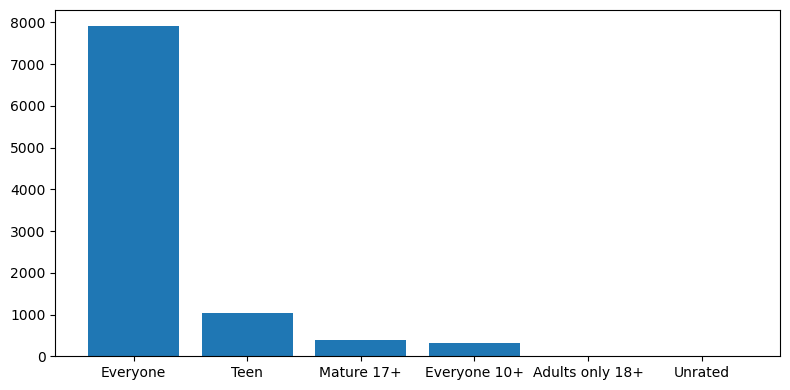

In [178]:
plt.figure(figsize=(8 , 4))
plt.bar(content_rating.index , content_rating.values)
plt.tight_layout()

In [179]:
df.groupby('Content Rating')['Installs'].sum().sort_values(ascending=False)

Content Rating
Everyone           52179352961
Teen               16487275393
Everyone 10+        4016271795
Mature 17+          2437986878
Adults only 18+        2000000
Unrated                  50500
Name: Installs, dtype: int64

In [180]:
df.groupby('Content Rating')['Rating'].mean().sort_values(ascending=False)

Content Rating
Adults only 18+    4.300000
Teen               4.234556
Everyone 10+       4.229814
Unrated            4.200000
Everyone           4.188055
Mature 17+         4.138168
Name: Rating, dtype: float64

In [181]:
df.groupby('Content Rating')['Reviews'].sum().sort_values(ascending=False)

Content Rating
Everyone           1300326506
Teen                503292211
Everyone 10+        201328121
Mature 17+           87038201
Adults only 18+         81348
Unrated                  1187
Name: Reviews, dtype: int64

#### Consider if app size impacts performance (e.g., smaller apps may be more accessible on low-storage devices).

In [182]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Current Ver', 'Android Ver',
       'Day', 'Month', 'Year'],
      dtype='object')

In [183]:
df['Size'].describe()

count      9659.000000
mean      37907.273631
std       23407.010000
min          11.000000
25%       21000.000000
50%       33000.000000
75%       50000.000000
max      100000.000000
Name: Size, dtype: float64

In [184]:
conditions = [
    (df['Size'] <= 21000),
    (df['Size'] > 21000) & (df['Size'] <= 50000),
    (df['Size'] > 50000)
]
size_labels = ['Small', 'Medium', 'Large']
df['Size_Category'] = pd.cut(df['Size'], bins=[-float('inf'), 21000, 50000, float('inf')], labels=size_labels)

In [185]:
df['Size_Category']

0        Small
1        Small
2        Large
3       Medium
4       Medium
         ...  
9654     Large
9655    Medium
9656     Large
9657    Medium
9658     Small
Name: Size_Category, Length: 9659, dtype: category
Categories (3, object): ['Small' < 'Medium' < 'Large']

In [186]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Current Ver', 'Android Ver',
       'Day', 'Month', 'Year', 'Size_Category'],
      dtype='object')

In [187]:
df.drop('App_Size_Category' , axis=1, inplace=True)

<class 'KeyError'>: "['App_Size_Category'] not found in axis"

In [188]:
df['Size_Category'].value_counts()

Size_Category
Medium    4752
Small     2544
Large     2363
Name: count, dtype: int64

#### Genere in category

In [189]:
cat_gen=df[['Category' , 'Genres']]
cat_gen

,Category,Genres
0,ART_AND_DESIGN,Art & Design
1,ART_AND_DESIGN,Art & Design;Pretend Play
2,ART_AND_DESIGN,Art & Design
3,ART_AND_DESIGN,Art & Design
4,ART_AND_DESIGN,Art & Design;Creativity
...,...,...
9654,FAMILY,Education
9655,FAMILY,Education
9656,MEDICAL,Medical
9657,BOOKS_AND_REFERENCE,Books & Reference


In [190]:
df[df['Category']=='ART_AND_DESIGN']['Genres'].value_counts()

Genres
Art & Design                       57
Art & Design;Creativity             5
Art & Design;Pretend Play           1
Art & Design;Action & Adventure     1
Name: count, dtype: int64

In [191]:
category=list(df['Category'].unique())

Category  : ART_AND_DESIGN
ART_AND_DESIGN
Genres
Art & Design                       57
Art & Design;Creativity             5
Art & Design;Pretend Play           1
Art & Design;Action & Adventure     1
Name: count, dtype: int64


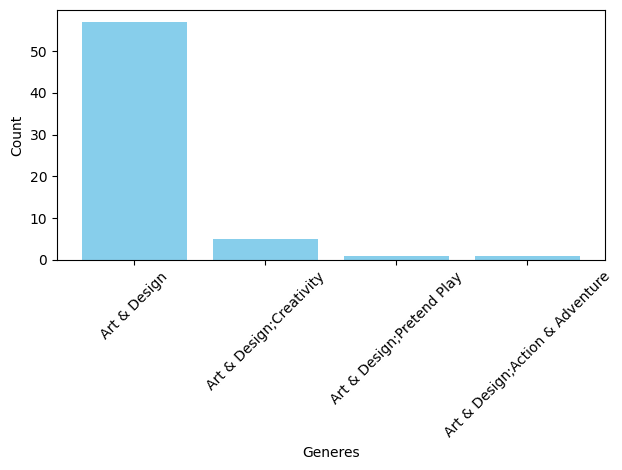


Category  : AUTO_AND_VEHICLES
AUTO_AND_VEHICLES
Genres
Auto & Vehicles    85
Name: count, dtype: int64

Category  : BEAUTY
BEAUTY
Genres
Beauty    53
Name: count, dtype: int64

Category  : BOOKS_AND_REFERENCE
BOOKS_AND_REFERENCE
Genres
Books & Reference    222
Name: count, dtype: int64

Category  : BUSINESS
BUSINESS
Genres
Business    420
Name: count, dtype: int64

Category  : COMICS
COMICS
Genres
Comics               55
Comics;Creativity     1
Name: count, dtype: int64


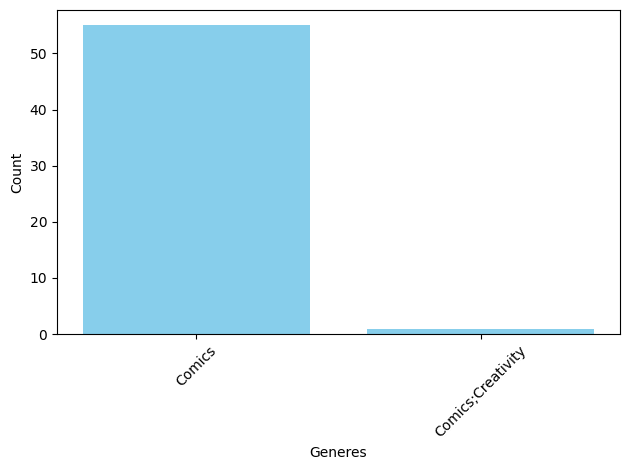


Category  : COMMUNICATION
COMMUNICATION
Genres
Communication    315
Name: count, dtype: int64

Category  : DATING
DATING
Genres
Dating    171
Name: count, dtype: int64

Category  : EDUCATION
EDUCATION
Genres
Education                       99
Education;Education              8
Education;Pretend Play           4
Education;Creativity             3
Education;Brain Games            3
Education;Music & Video          1
Education;Action & Adventure     1
Name: count, dtype: int64


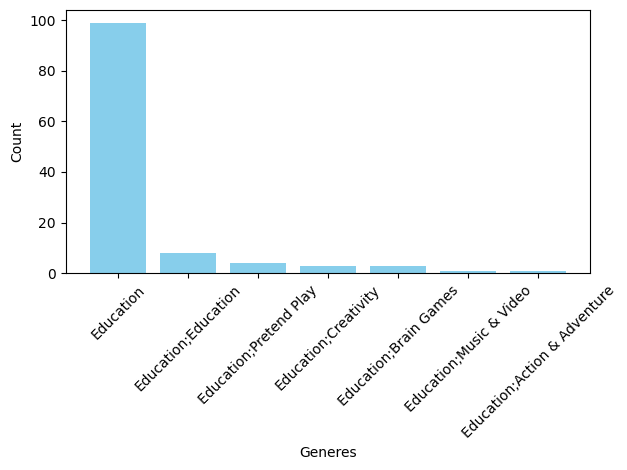


Category  : ENTERTAINMENT
ENTERTAINMENT
Genres
Entertainment                  92
Entertainment;Music & Video     7
Entertainment;Brain Games       2
Entertainment;Creativity        1
Name: count, dtype: int64


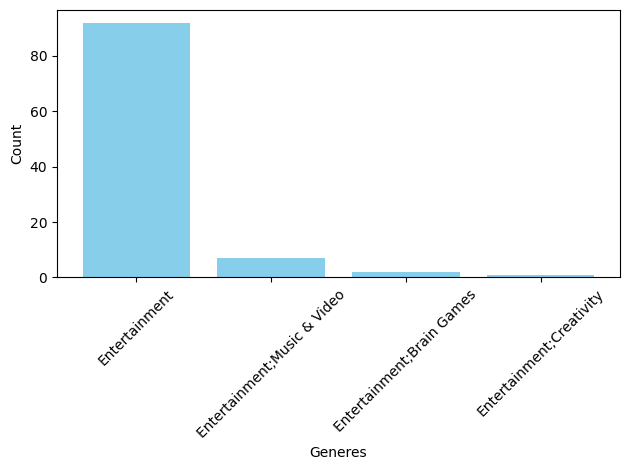


Category  : EVENTS
EVENTS
Genres
Events    64
Name: count, dtype: int64

Category  : FINANCE
FINANCE
Genres
Finance    345
Name: count, dtype: int64

Category  : FOOD_AND_DRINK
FOOD_AND_DRINK
Genres
Food & Drink    112
Name: count, dtype: int64

Category  : HEALTH_AND_FITNESS
HEALTH_AND_FITNESS
Genres
Health & Fitness    288
Name: count, dtype: int64

Category  : HOUSE_AND_HOME
HOUSE_AND_HOME
Genres
House & Home    74
Name: count, dtype: int64

Category  : LIBRARIES_AND_DEMO
LIBRARIES_AND_DEMO
Genres
Libraries & Demo    84
Name: count, dtype: int64

Category  : LIFESTYLE
LIFESTYLE
Genres
Lifestyle                 368
Lifestyle;Pretend Play      1
Name: count, dtype: int64


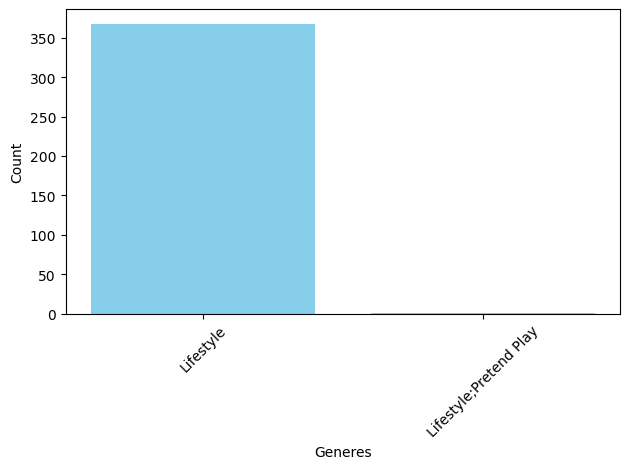


Category  : GAME
GAME
Genres
Action                           299
Arcade                           184
Racing                            91
Adventure                         73
Card                              47
Board                             41
Casino                            39
Trivia                            38
Puzzle                            24
Casual                            23
Word                              23
Music                             19
Strategy                          17
Role Playing                      15
Simulation                        10
Sports                             6
Action;Action & Adventure          3
Casual;Brain Games                 1
Simulation;Action & Adventure      1
Adventure;Action & Adventure       1
Simulation;Education               1
Casual;Action & Adventure          1
Casual;Pretend Play                1
Casual;Creativity                  1
Name: count, dtype: int64


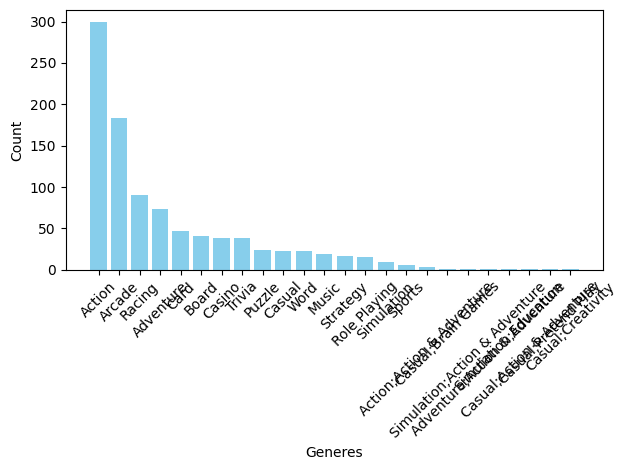


Category  : FAMILY
FAMILY
Genres
Entertainment                         469
Education                             411
Simulation                            183
Casual                                142
Puzzle                                 95
                                     ... 
Video Players & Editors;Creativity      1
Music & Audio;Music & Video             1
Casual;Music & Video                    1
Board;Pretend Play                      1
Strategy;Creativity                     1
Name: count, Length: 70, dtype: int64


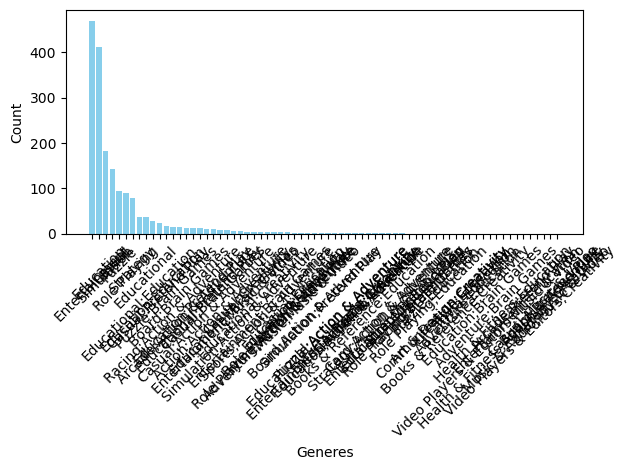


Category  : MEDICAL
MEDICAL
Genres
Medical    395
Name: count, dtype: int64

Category  : SOCIAL
SOCIAL
Genres
Social    239
Name: count, dtype: int64

Category  : SHOPPING
SHOPPING
Genres
Shopping    202
Name: count, dtype: int64

Category  : PHOTOGRAPHY
PHOTOGRAPHY
Genres
Photography    281
Name: count, dtype: int64

Category  : SPORTS
SPORTS
Genres
Sports    325
Name: count, dtype: int64

Category  : TRAVEL_AND_LOCAL
TRAVEL_AND_LOCAL
Genres
Travel & Local                       218
Travel & Local;Action & Adventure      1
Name: count, dtype: int64


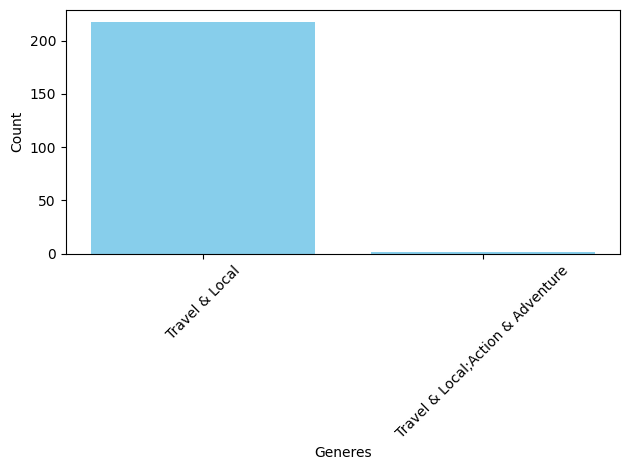


Category  : TOOLS
TOOLS
Genres
Tools              826
Tools;Education      1
Name: count, dtype: int64


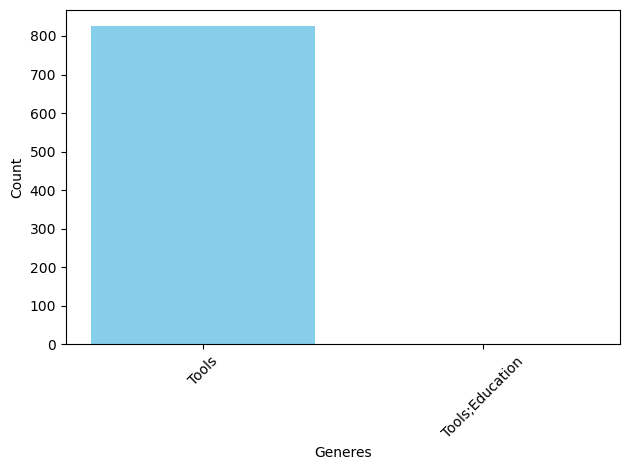


Category  : PERSONALIZATION
PERSONALIZATION
Genres
Personalization    376
Name: count, dtype: int64

Category  : PRODUCTIVITY
PRODUCTIVITY
Genres
Productivity    374
Name: count, dtype: int64

Category  : PARENTING
PARENTING
Genres
Parenting                  46
Parenting;Education         7
Parenting;Music & Video     6
Parenting;Brain Games       1
Name: count, dtype: int64


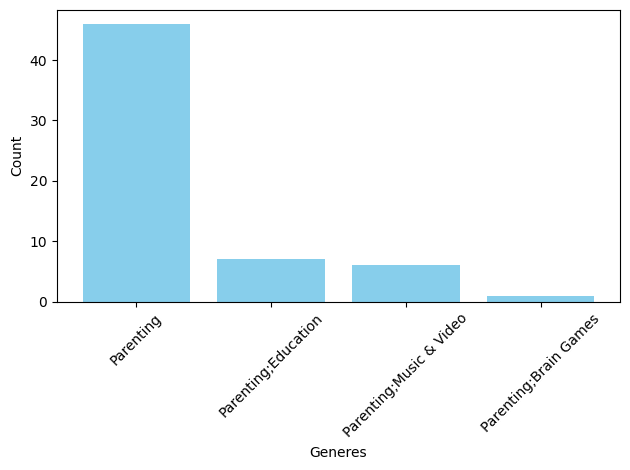


Category  : WEATHER
WEATHER
Genres
Weather    79
Name: count, dtype: int64

Category  : VIDEO_PLAYERS
VIDEO_PLAYERS
Genres
Video Players & Editors                  162
Video Players & Editors;Music & Video      1
Name: count, dtype: int64


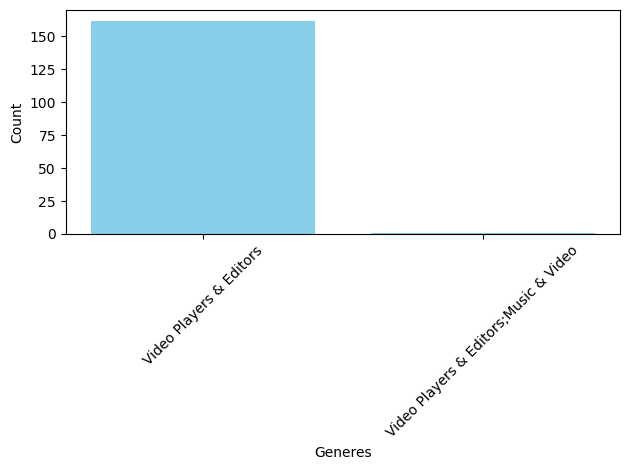


Category  : NEWS_AND_MAGAZINES
NEWS_AND_MAGAZINES
Genres
News & Magazines    254
Name: count, dtype: int64

Category  : MAPS_AND_NAVIGATION
MAPS_AND_NAVIGATION
Genres
Maps & Navigation    131
Name: count, dtype: int64



In [192]:
for cat in category:
    cat_gen_series = df[df['Category']==cat]['Genres'].value_counts()
    print(f"Category  : {cat}")
    print(cat)
    print(cat_gen_series)
    if len(list(cat_gen_series.index))!=1:
        plt.bar(cat_gen_series.index , cat_gen_series.values , color='skyblue')
        plt.xlabel('Generes')
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
    print()

In [193]:
categories=['FAMILY', 'GAME']
categories

['FAMILY', 'GAME']

In [194]:
family=df[df['Category']=='FAMILY']['Genres'].value_counts().head(10)
family

Genres
Entertainment            469
Education                411
Simulation               183
Casual                   142
Puzzle                    95
Role Playing              90
Strategy                  78
Educational;Education     38
Educational               37
Education;Education       28
Name: count, dtype: int64

In [195]:
game=df[df['Category']=='GAME']['Genres'].value_counts().head(10)
game

Genres
Action       299
Arcade       184
Racing        91
Adventure     73
Card          47
Board         41
Casino        39
Trivia        38
Puzzle        24
Casual        23
Name: count, dtype: int64

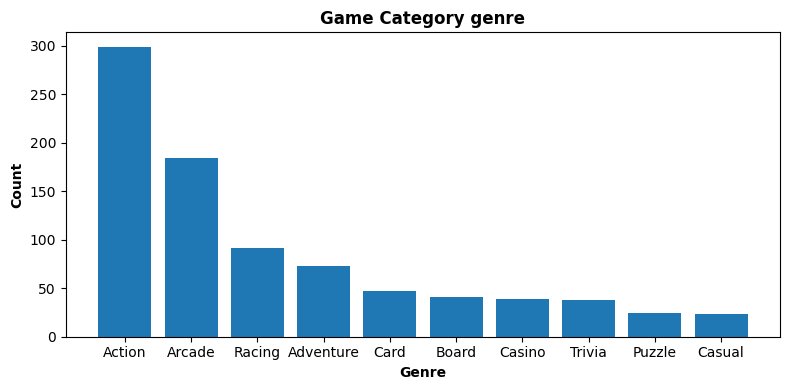

In [196]:
plt.figure(figsize=(8 , 4))
plt.title('Game Category genre' , fontweight='bold')
plt.bar(game.index , game.values)
plt.xlabel('Genre' , fontweight='bold')
plt.ylabel('Count' , fontweight='bold')
plt.tight_layout()

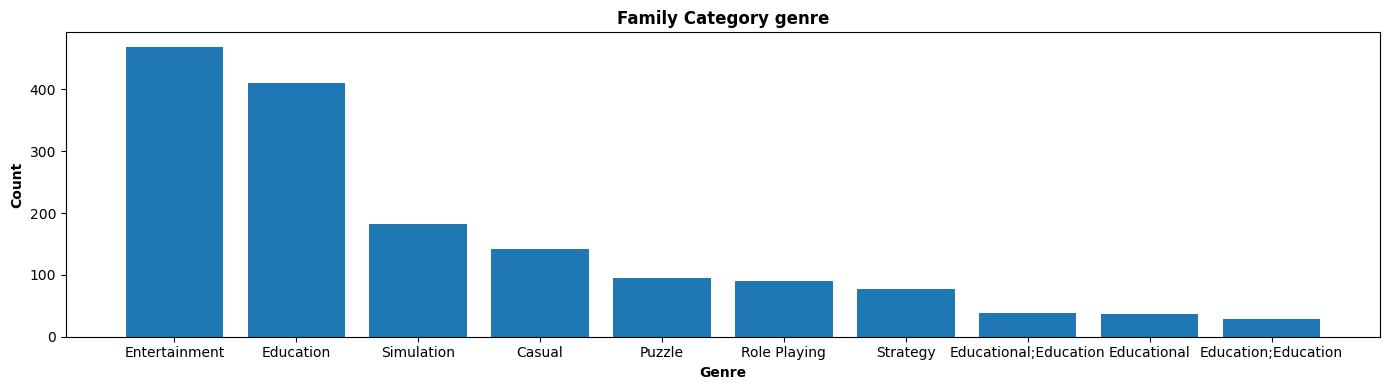

In [197]:
plt.figure(figsize=(14 , 4))
plt.title('Family Category genre' , fontweight='bold')
plt.bar(family.index , family.values )
plt.xlabel('Genre' , fontweight='bold')
plt.ylabel('Count' , fontweight='bold')
plt.tight_layout()

#### Identify trends in successful app launches by release dates. For example, apps released in specific months might perform better due to seasonal demand.

In [198]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Current Ver', 'Android Ver',
       'Day', 'Month', 'Year', 'Size_Category'],
      dtype='object')

In [199]:
app_by_year = df['Year'].value_counts()
app_by_year

Year
2018    6284
2017    1794
2016     779
2015     449
2014     203
2013     108
2012      26
2011      15
2010       1
Name: count, dtype: int64

In [200]:
popular_app_by_installs=df[['App' , 'Installs' , 'Year']].sort_values(by='Installs' , ascending=False).head(10)[['App'  , 'Year']].reset_index(drop=True)
popular_app_by_installs 

,App,Year
0,WhatsApp Messenger,2018
1,Google Play Books,2018
2,Subway Surfers,2018
3,Maps - Navigate & Explore,2018
4,Gmail,2018
5,Instagram,2018
6,Facebook,2018
7,Google Chrome: Fast & Secure,2018
8,Google+,2018
9,YouTube,2018


In [201]:
popular_app_by_rating=df[['App' , 'Rating' , 'Year']].sort_values(by=['Rating' , 'App'] , ascending=[False , False]).head(10)[['App' , 'Year']].reset_index(drop=True)
popular_app_by_rating 

,App,Year
0,meStudying: AP English Lit,2013
1,iReadMe,2018
2,iCard BD Plus,2016
3,i am EB,2017
4,ei Calc,2015
5,daskal.eu,2017
6,cx advance call blocker,2018
7,chat dz,2018
8,Zen Leaf,2018
9,You're an Anime,2018


In [202]:
popular_app_by_review=df[['App' , 'Reviews' , 'Year']].sort_values(by='Reviews' , ascending=False).head(10)[['App' , 'Year']].reset_index(drop=True)
popular_app_by_review

,App,Year
0,Facebook,2018
1,WhatsApp Messenger,2018
2,Instagram,2018
3,Messenger – Text and Video Chat for Free,2018
4,Clash of Clans,2018
5,Clean Master- Space Cleaner & Antivirus,2018
6,Subway Surfers,2018
7,YouTube,2018
8,"Security Master - Antivirus, VPN, AppLock, Boo...",2018
9,Clash Royale,2018


Text(0, 0.5, 'Frequency')

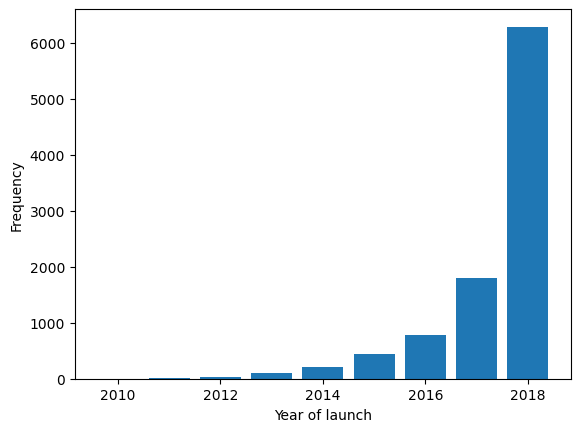

In [203]:
plt.bar(app_by_year.index , app_by_year.values )
plt.xlabel('Year of launch')
plt.ylabel('Frequency')

### Q17. A marketing research firm wants to analyze the Google Playstore dataset to identify the best time to  launch a new app. What features would you analyze to make recommendations to the company, and what data visualizations would you use to present your findings?

In [204]:
app_by_year = df['Year'].value_counts()
app_by_year

Year
2018    6284
2017    1794
2016     779
2015     449
2014     203
2013     108
2012      26
2011      15
2010       1
Name: count, dtype: int64

In [205]:
app_by_month_2018 = df[df['Year']==2018]['Month'].value_counts()
app_by_month_2018

Month
7    2320
8     977
6     913
5     691
3     407
4     394
2     296
1     286
Name: count, dtype: int64

Text(0, 0.5, 'Frequency')

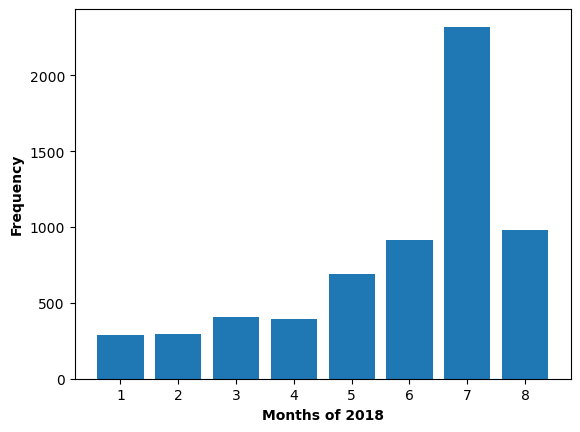

In [206]:
plt.bar(app_by_month_2018.index , app_by_month_2018.values)
plt.xlabel('Months of 2018' , fontweight='bold')
plt.ylabel('Frequency' , fontweight='bold')

In [207]:
year=list(app_by_year.index)
year

[2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010]

In [208]:
app_by_year

Year
2018    6284
2017    1794
2016     779
2015     449
2014     203
2013     108
2012      26
2011      15
2010       1
Name: count, dtype: int64

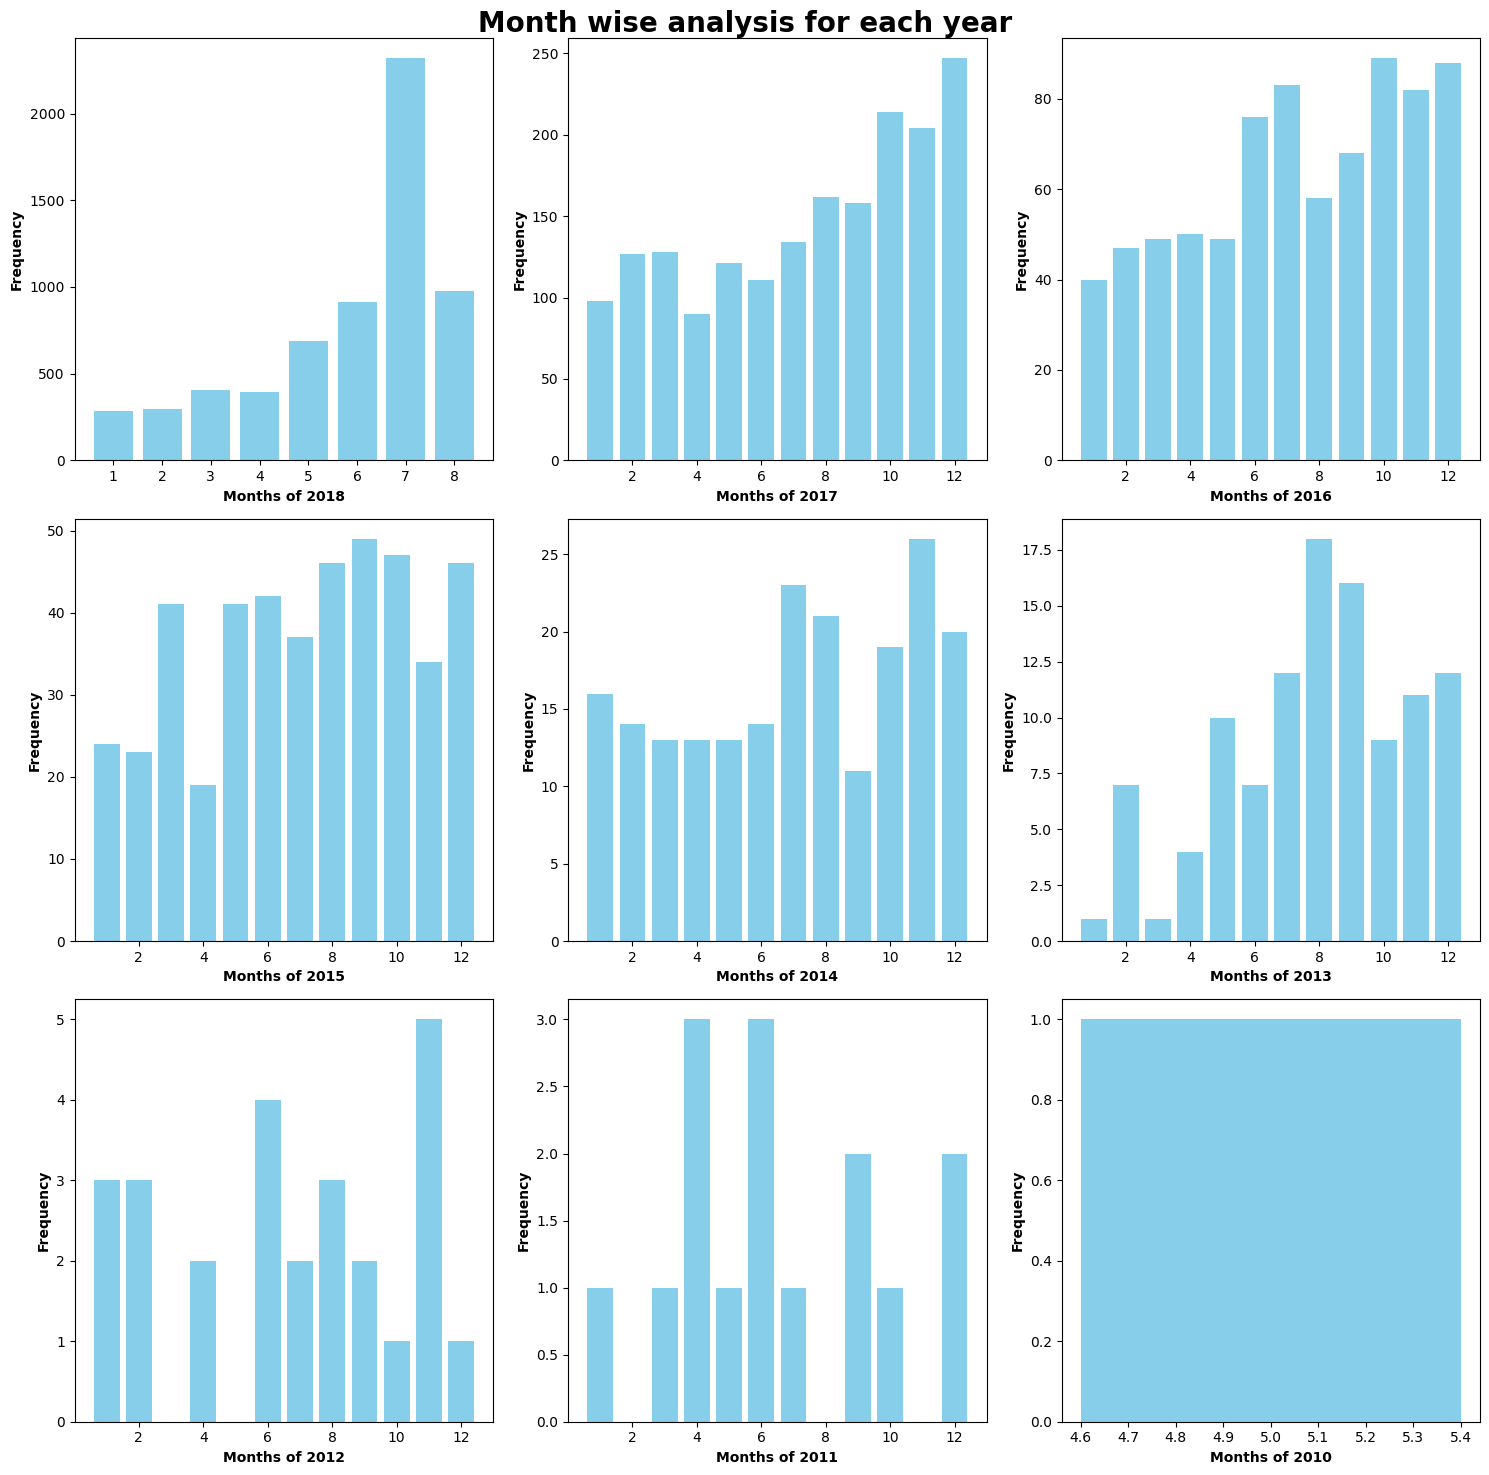

In [209]:
plt.figure(figsize=(15 ,15))
plt.suptitle("Month wise analysis for each year" , fontweight='bold' , fontsize=20)

for i in range(0 , len(year)):

    plt.subplot(3 , 3 , i+1)
    app_by_year_n=df[df['Year']==year[i]]['Month'].value_counts()
    plt.bar(app_by_year_n.index , app_by_year_n.values , color='skyblue')
    plt.xlabel(f"Months of {year[i]}" ,  fontweight='bold')
    plt.ylabel('Frequency' ,  fontweight='bold')
    plt.tight_layout()
    

#### Based on the observation above it can be seen that most of the apps are launched in last quarter of calender year 

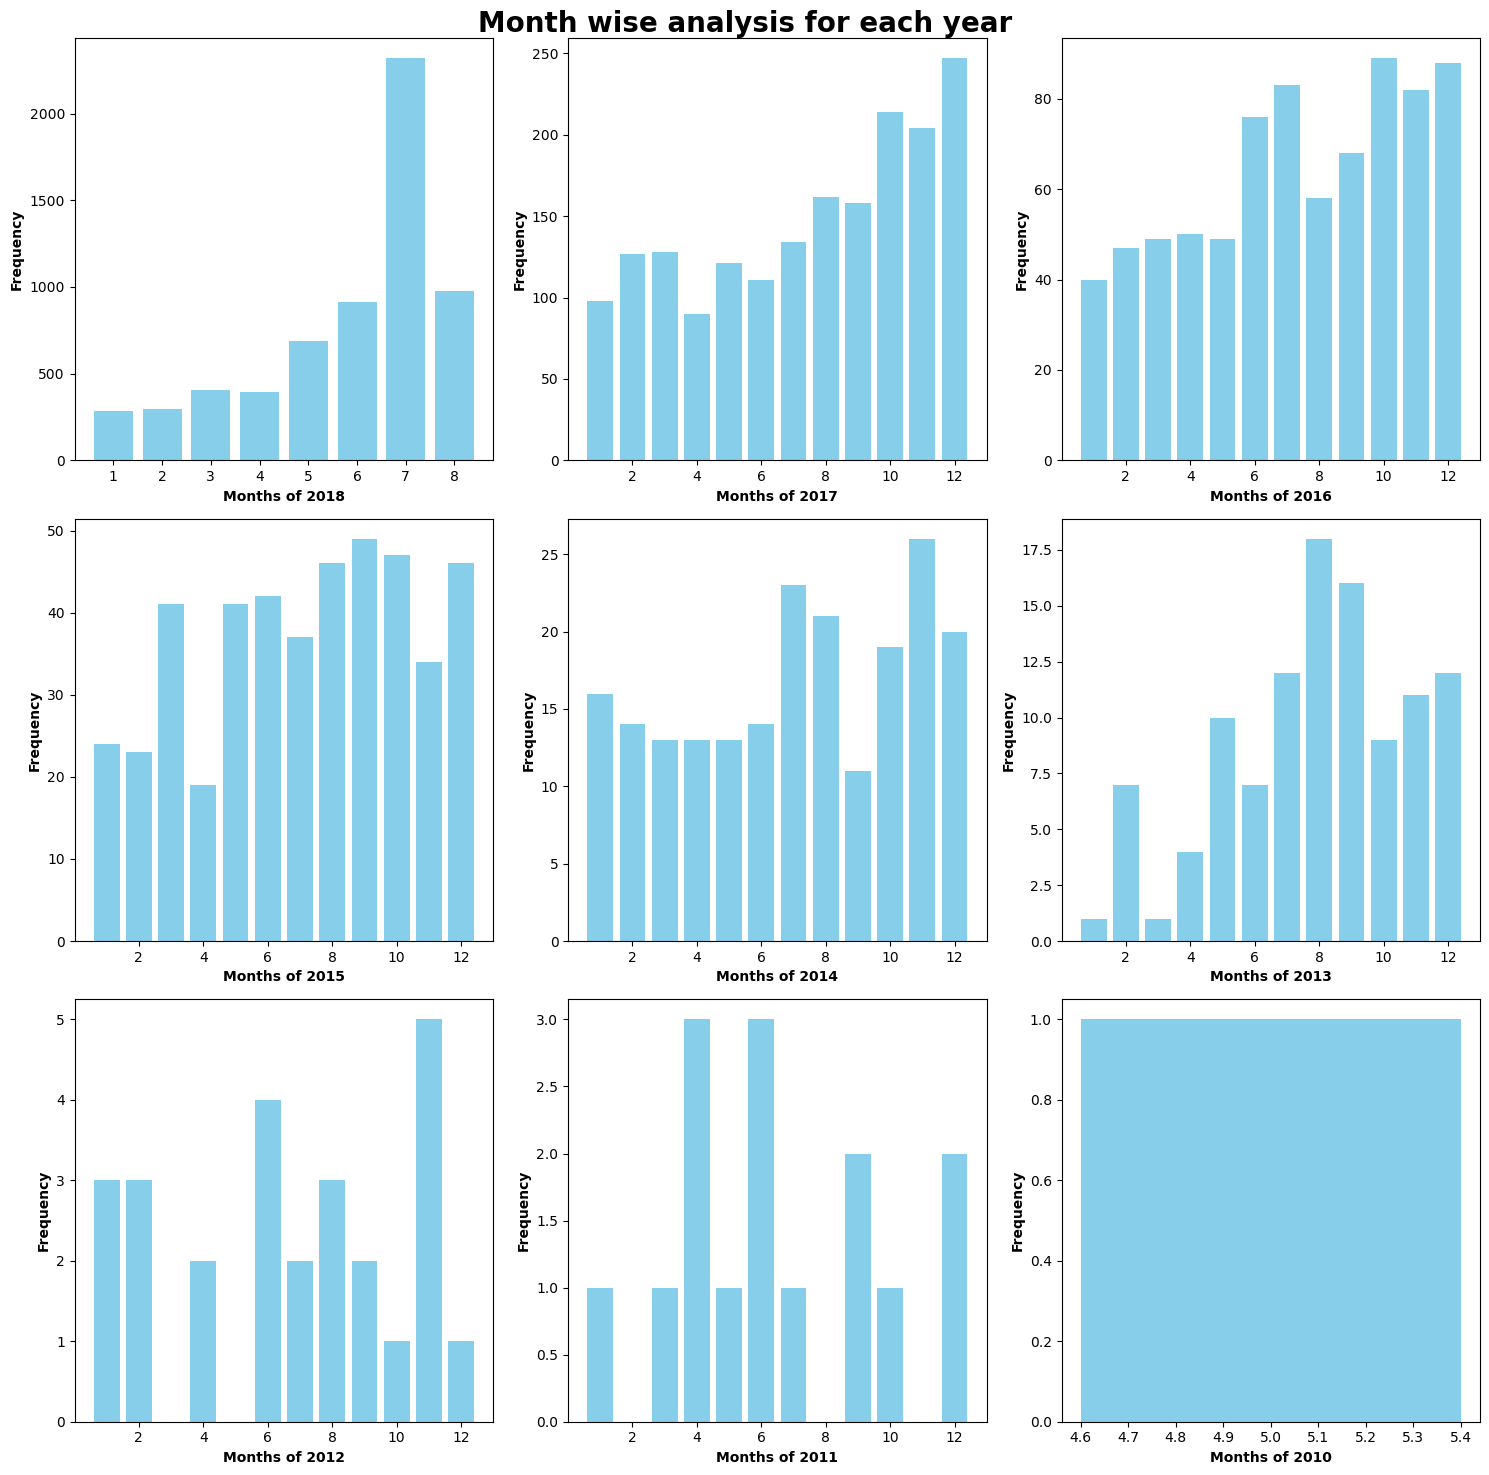

In [210]:
plt.figure(figsize=(15 ,15))
plt.suptitle("Month wise analysis for each year" , fontweight='bold' , fontsize=20)

for i in range(0 , len(year)):

    plt.subplot(3 , 3 , i+1)
    app_by_year_n=df[df['Year']==year[i]]['Month'].value_counts()
    plt.bar(app_by_year_n.index , app_by_year_n.values , color='skyblue')
    plt.xlabel(f"Months of {year[i]}" ,  fontweight='bold')
    plt.ylabel('Frequency' ,  fontweight='bold')
    plt.tight_layout()
    

In [214]:
month_wise_analysis=df[df['Year']==2018][['Month' , 'Installs']]
month_wise_analysis.groupby('Month')['Installs'].sum()

Month
1      732451196
2      678320574
3      605561954
4     1239196039
5     3444428776
6     4575500152
7    28124296441
8    30728005487
Name: Installs, dtype: int64

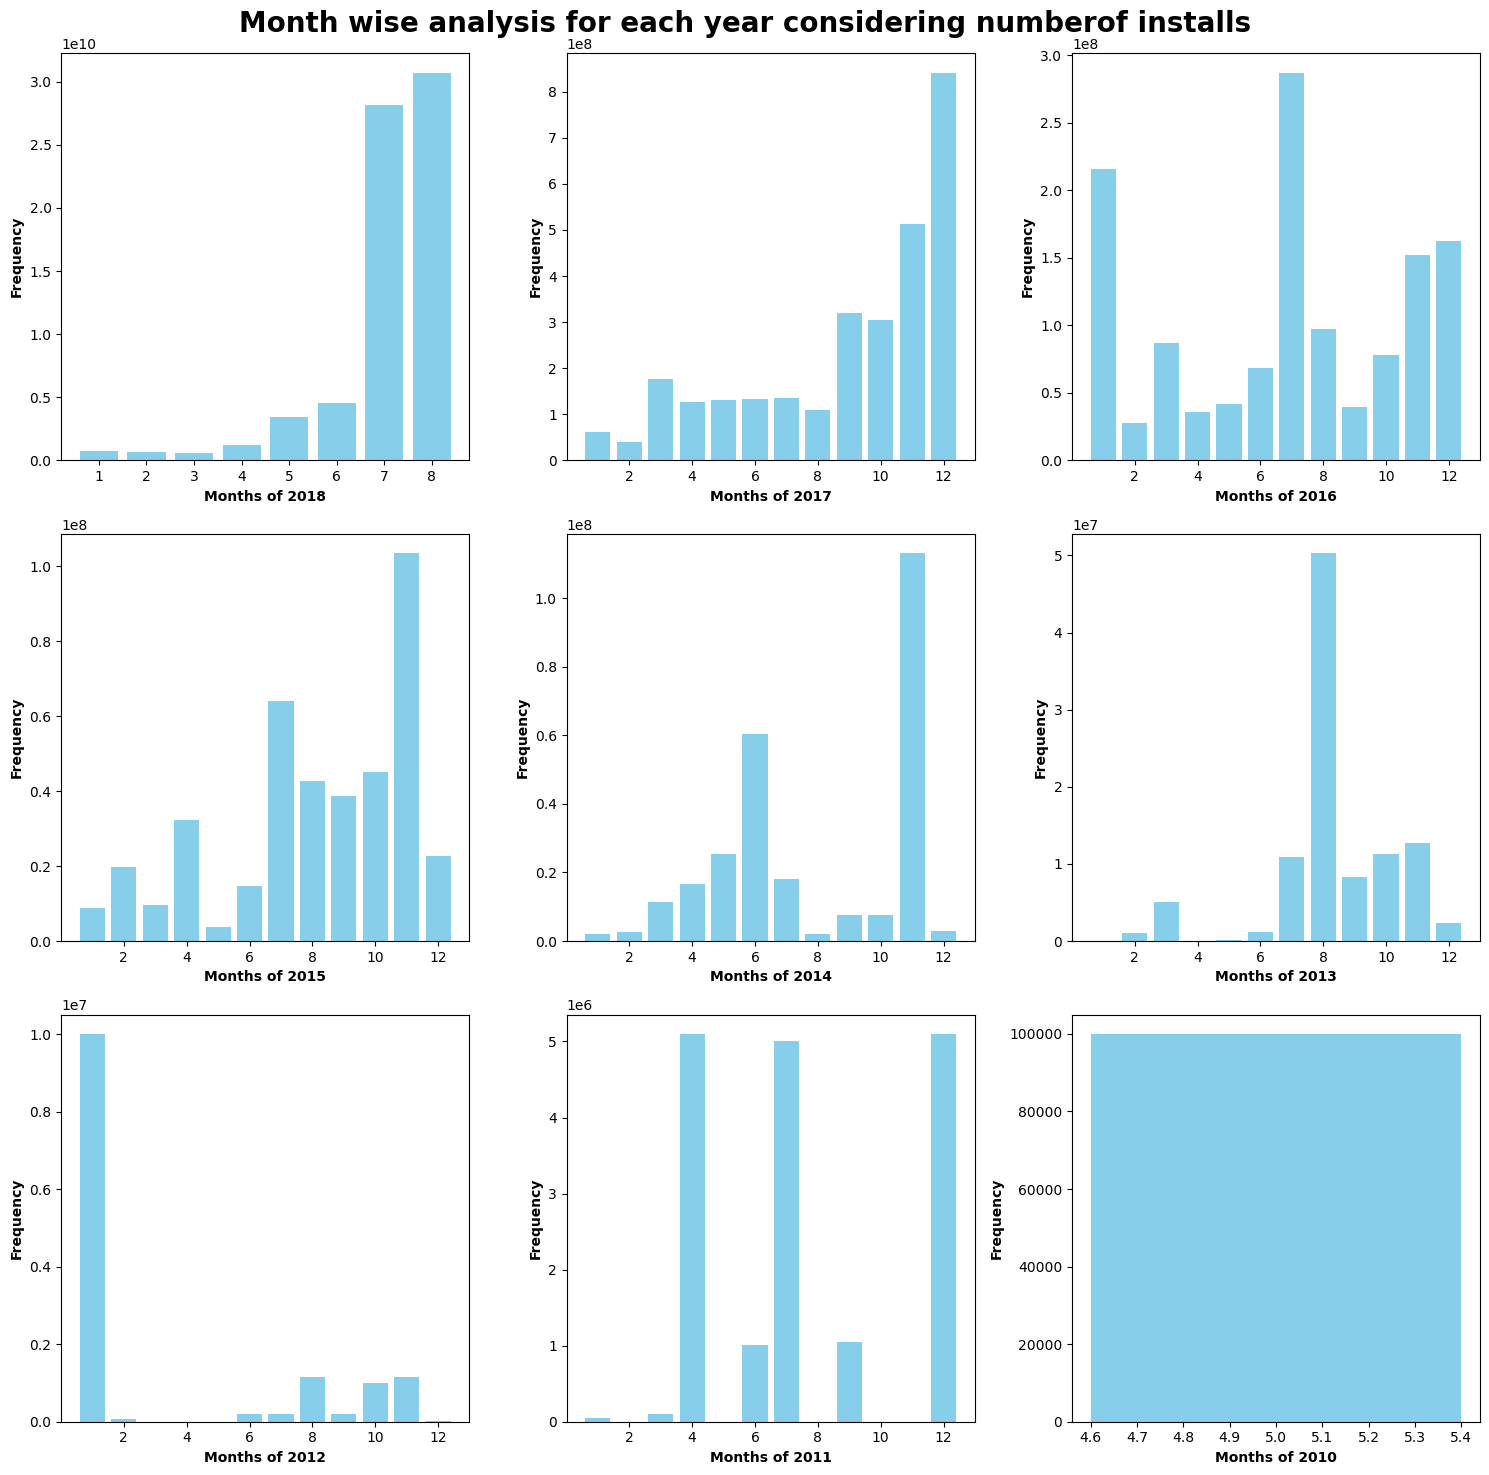

In [216]:
plt.figure(figsize=(15 ,15))
plt.suptitle("Month wise analysis for each year considering numberof installs" , fontweight='bold' , fontsize=20)

for i in range(0 , len(year)):

    plt.subplot(3 , 3 , i+1)
    month_wise_analysis=df[df['Year']==year[i]][['Month' , 'Installs']]
    analysis_for_n_year = month_wise_analysis.groupby('Month')['Installs'].sum()
    plt.bar(analysis_for_n_year.index , analysis_for_n_year.values , color='skyblue')
    plt.xlabel(f"Months of {year[i]}" ,  fontweight='bold')
    plt.ylabel('Frequency' ,  fontweight='bold')
    plt.tight_layout()
    

#### In most of the cases last quarter apps have proved to the most popular based on number of installs with a few exceptions in 2016,and 2012